In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

- creating Dataframe from reading the csv file `final cleaned df`

In [232]:
df = pd.read_csv('final cleaned df.csv',index_col=False)

In [233]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [234]:
df = df[pd.to_datetime(df['Number of Hrs. Available']).dt.hour <= 12]

C:\Users\DELL\AppData\Local\Temp\ipykernel_16320\3340373297.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[pd.to_datetime(df['Number of Hrs. Available']).dt.hour <= 12]


In [235]:
df.head()

,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
0,Dr. Kaustubh Das,Dentist,22.0,"BDS, MFDS RCPS(Glasgow), FFD RCS (IRE)",500.0,0.0,ASPIRE CLINIC,Kolkata,10:00:00,19:00:00,Kolkata,500.0,09:00
1,Dr. Asif Naushad,Dentist,19.0,"House Surgeon, House Surgeon, House Surgeon, BDS",300.0,300.0,JM DENTAL,Kolkata,10:00:00,21:00:00,Kolkata,600.0,11:00
2,Dr. Prabhjeet Singh Sethi,Dentist,24.0,Certified Implantologist,500.0,350.0,Dontia Dental Care,Kolkata,15:00:00,20:00:00,Kolkata,850.0,05:00
3,Dr. Sanket Chakraverty,Dentist,15.0,"MDS Prosthodontics, B.D.S",300.0,300.0,Teeth Care Multispeciality Dental Clinic,Rajarhat Road,16:30:00,20:30:00,Kolkata,600.0,04:00
4,Dr. Subhajit Dutta,Dentist,13.0,BDS,500.0,300.0,SIGNATURE SMILE Dental Clinic,Kolkata,17:00:00,21:00:00,Kolkata,800.0,04:00


# Full Univariate Analyisis  Numeric

### Experience column

In [236]:
df['Experience (in years)'].describe()

count    2096.000000
mean       20.265267
std        11.003764
min         0.000000
25%        13.000000
50%        19.000000
75%        26.000000
max        61.000000
Name: Experience (in years), dtype: float64

# 1

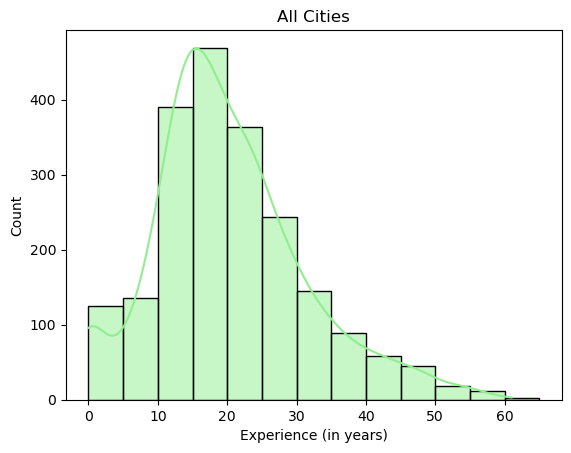

In [237]:
#  histogram with kde = True for numerical col (experience in years)

sns.histplot(data=df["Experience (in years)"],bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65], kde = True, color = 'lightgreen')
plt.title('All Cities')
plt.show()

- From the above Histogram plot there are :
1. highest number of doctors with between 15-20 years of experience
2. lowest number of doctors with greater than 55 years of experience

<Axes: xlabel='Experience (in years)', ylabel='Density'>

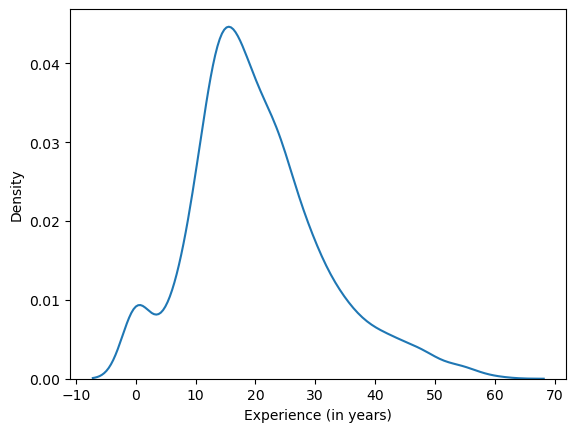

In [238]:
# density plot
sns.kdeplot(df['Experience (in years)'])

In [239]:
q1 = np.quantile(df['Experience (in years)'],.25)
q2 = np.quantile(df['Experience (in years)'],.50)
q3 = np.quantile(df['Experience (in years)'],.75)

iqr = q3 - q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)



In [240]:
df[(df['Experience (in years)'] > ub)  |  (df['Experience (in years)'] < lb)]

,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
60,Dt. Ritu. Nandi,Dietitian/Nutritionist,49.0,"MBBS, MD - Dermatology",800.0,0.0,Skin and Hair Clinic,Kolkata,12:00:00,13:00:00,Kolkata,800.0,01:00
68,Dt. Pallavi Majumder,Dietitian/Nutritionist,46.0,"MBBS, DGO, Diploma in Venerology and Dermatology",700.0,0.0,Royd Skin Hair And Laser Center,Kolkata,14:00:00,17:00:00,Kolkata,700.0,03:00
114,Dr. Suman Biswas Md Mbbs,General Physician,50.0,MBBS,500.0,0.0,A.D Center,Kalighat,16:00:00,19:00:00,Kolkata,500.0,03:00
148,Dr. Soumya Paik,Orthopedist,55.0,MBBS,400.0,0.0,Dr. D.K.Sadhu,Golpark,11:00:00,12:30:00,Kolkata,400.0,01:30
154,Dr. Sanjib Sengupta,Orthopedist,47.0,"MBBS, DGO",200.0,400.0,Health Clinic,Naktala,11:00:00,13:00:00,Kolkata,600.0,02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,Dr. Sharda Jain,Gynaecologist,55.0,"FIMSA, FICOG, MNAMS (Obstetrtics & Gynaecology...",800.0,0.0,Lifecare Centre,HSR Layout,09:00:00,12:00:00,Bangalore,800.0,03:00
2113,Dr. Padmini Isaac,Gynaecologist,46.0,"MBBS, DGO - Preventive & Social Medicine, MD -...",950.0,0.0,Cloudnine Hospital - Jayanagar,Jayanagar,18:00:00,20:00:00,Bangalore,950.0,02:00
2133,Dr. Jyothika Desai,Gynaecologist,53.0,MBBS,400.0,0.0,Pr Desai Hospital,Bangalore,10:00:00,13:00:00,Bangalore,400.0,03:00
2137,Dr. Shashikala R Patil,Gynaecologist,49.0,"MBBS, DGO, MD",500.0,0.0,Icon Hospital,Bangalore,12:00:00,13:00:00,Bangalore,500.0,01:00


<Axes: title={'center': 'All cities'}, xlabel='Experience (in years)'>

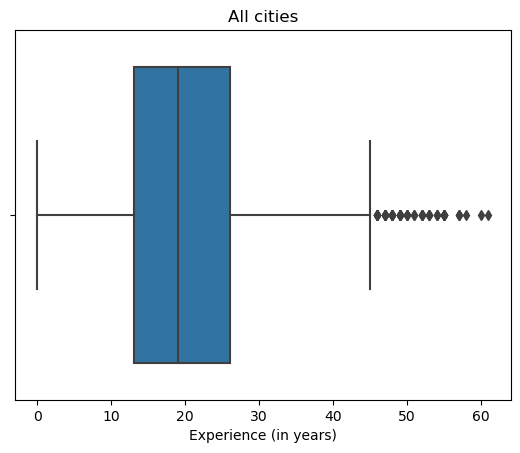

In [241]:
# boxplot
plt.title('All cities')
sns.boxplot(x=df["Experience (in years)"])

- From the box plot there are outliers in the experience columns, which is data is right skewed

In [242]:
# # line plot  # big no
# plt.figure(figsize=(200,200))
# sns.lineplot(x=range(len(df)), y="Experience (in years)", data=df)

### Fee at clinic

<Axes: title={'center': 'Count of Fee at clinic in ranges'}, xlabel='Fee at clinic in Rupees', ylabel='count'>

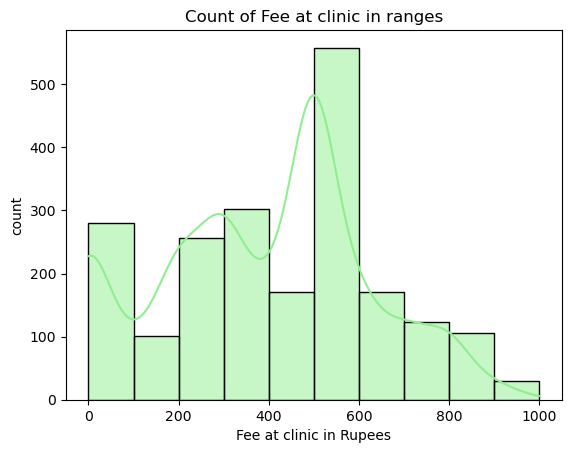

In [243]:
plt.title('Count of Fee at clinic in ranges')
plt.ylabel('count')
plt.xlabel('Fee at clinic in Rupees')
sns.histplot(data=df["Fee at clinic"],bins=[0,100,200,300,400,500,600,700,800,900,1000], kde = True, color = 'lightgreen')

        - From the histogram plot large number of `fee at clinic` are in between 500 to 600 rupees 
        - and lowest between 900 to 1000 rupees

<Axes: xlabel='Fee at clinic', ylabel='Density'>

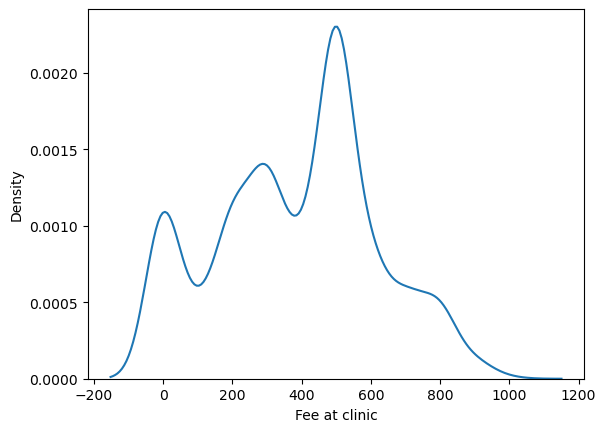

In [244]:
# density plot
sns.kdeplot(df["Fee at clinic"])

In [245]:
q1 = np.quantile(df['Fee at clinic'],.25)
q2 = np.quantile(df['Fee at clinic'],.50)
q3 = np.quantile(df['Fee at clinic'],.75)

iqr = q3 - q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)
 

In [246]:
df[df['Fee at clinic'] > ub]

,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
189,Dr. Atanu Kumar Maitra,Homeopathy,25.0,"MBBS, Diploma in Orthopaedics, MS - Orthopaedics",990.0,0.0,Fortis Hospital,Anandpur,10:00:00,12:00:00,Kolkata,990.0,02:00
512,Dr. Saurabh Bhatia,Psychologist,27.0,"MBBS, MS, FCR",999.0,99.0,Dr Saurabh Bhatia,NIBM,09:00:00,21:00:00,Pune,1098.0,12:00


<Axes: xlabel='Fee at clinic'>

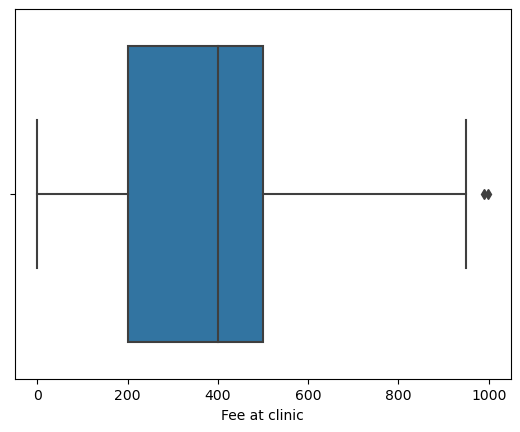

In [247]:
sns.boxplot(x=df["Fee at clinic"])

    - There are very few (to be precise only 2) outliers are there in the Fee at clinic 
    - above upper boundary (950) 

### Online Fee

<Axes: title={'center': 'Count of Online Fee in ranges'}, xlabel='Online Fee in Rupees', ylabel='count'>

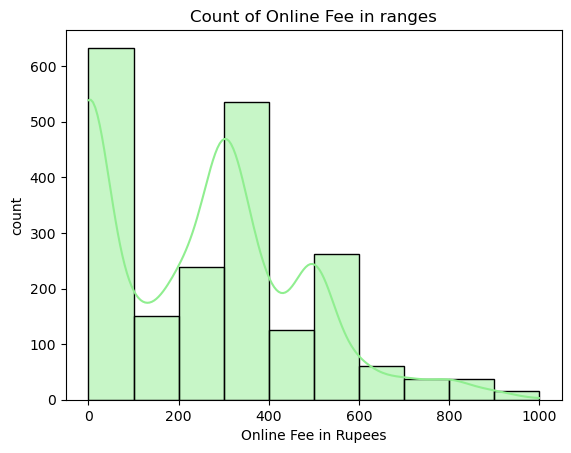

In [248]:
plt.title('Count of Online Fee in ranges')
plt.ylabel('count')
plt.xlabel('Online Fee in Rupees')

sns.histplot(data=df["Online Fee"],bins=[0,100,200,300,400,500,600,700,800,900,1000], kde = True,color = 'lightgreen')

        - From the histogram plot large number of `Online Fee` are in between 0 to 100 rupees 
        - and lowest between 900 to 1000 rupees

<Axes: xlabel='Online Fee', ylabel='Density'>

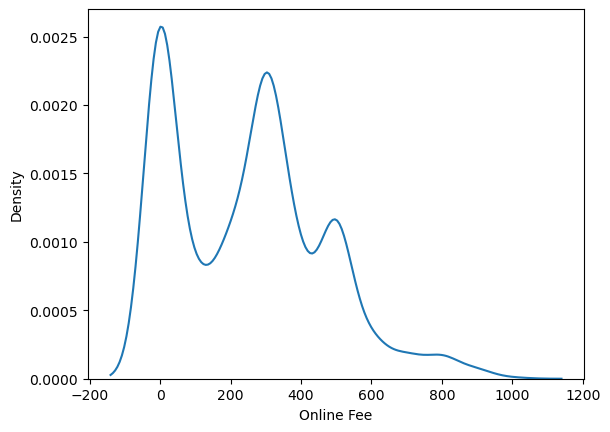

In [249]:
# density plot

sns.kdeplot(df["Online Fee"])

<Axes: xlabel='Online Fee'>

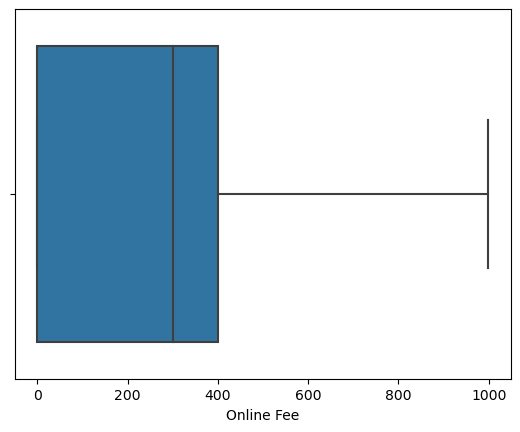

In [250]:
sns.boxplot(x=df["Online Fee"])

In [251]:
q1 = np.quantile(df['Online Fee'],.25)
q2 = np.quantile(df['Online Fee'],.50)
q3 = np.quantile(df['Online Fee'],.75)

iqr = q3 - q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)
 

In [252]:
df[(df['Online Fee'] > ub) | (df['Online Fee'] < lb)]

,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available


### Total Fee

<Axes: title={'center': 'All cities'}, xlabel='Total Fee', ylabel='Count'>

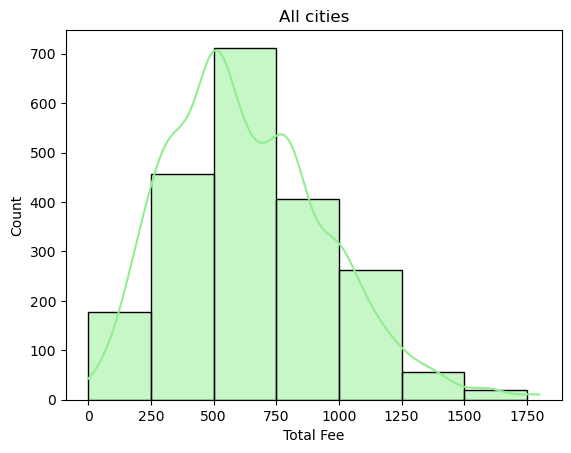

In [253]:
plt.title('All cities')
sns.histplot(data=df["Total Fee"],bins=[0,250,500,750,1000,1250,1500,1750], kde = True, color = 'lightgreen')

        - From the histogram plot large number of `Online Fee` are in between 500 to 750 rupees 
        - and lowest between 1500 to 1750 rupees

<Axes: xlabel='Total Fee', ylabel='Density'>

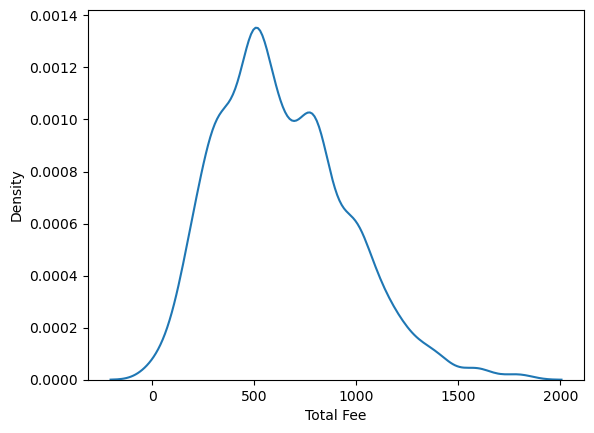

In [254]:
# density plot
sns.kdeplot(df["Total Fee"])

<Axes: xlabel='Total Fee'>

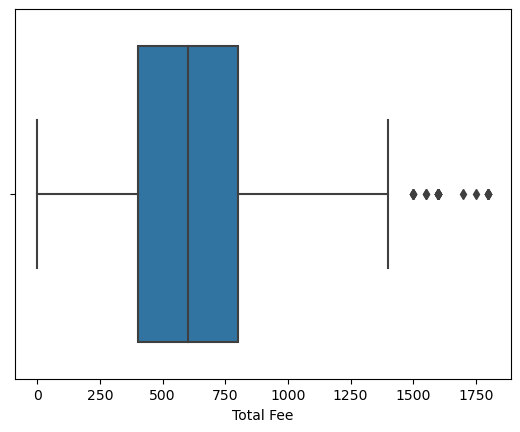

In [255]:
# box plot
sns.boxplot(x=df["Total Fee"])

In [256]:
q1 = np.quantile(df['Total Fee'],.25)
q2 = np.quantile(df['Total Fee'],.50)
q3 = np.quantile(df['Total Fee'],.75)

iqr = q3 - q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)
 

In [257]:
(df['Total Fee'] > ub).sum()

26

In [258]:
df[df['Total Fee'] > ub]

,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
46,Dt. Aparajita Saha,Dietitian/Nutritionist,19.0,"MBBS, MD - Dermatology , Venereology & Leprosy",850.0,900.0,The Newtown Clinic,New Town,09:00:00,11:00:00,Kolkata,1750.0,02:00
157,Dr. Snigdhodip Saha,Homeopathy,23.0,"MBBS, D.ORTHO, MS, Fellowship in Minimally Inv...",950.0,600.0,Apollo Clinic,Kolkata,15:00:00,17:00:00,Kolkata,1550.0,02:00
246,Dr. K.R Chandvania,Dermatologist,42.0,MD - Dermatology,900.0,900.0,Skin Square by Pallavi Laser Centre (Pimpri),Pimpri,18:00:00,20:00:00,Pune,1800.0,02:00
252,Dr. Shruti Jadhav-devershi,Dermatologist,14.0,"MBBS, Diploma In Dermatology And Venerology An...",600.0,999.0,Solskin Professional Dermacare,Kharadi,18:00:00,20:00:00,Pune,1599.0,02:00
499,Dr. Patil S D,Psychologist,36.0,"M.A. Psychology, PHD",900.0,900.0,Hypnotherapy Clinic,Pimpri Chinchwad,09:00:00,21:00:00,Pune,1800.0,12:00
607,Dr. Neeraj Kumar,Dermatologist,14.0,"MBBS, MD - Dermatology",800.0,800.0,Magical Morphers Pvt Ltd,Delhi,17:00:00,20:00:00,Delhi,1600.0,03:00
609,Dr. Rajesh Aggarwal,Dermatologist,22.0,"MD - Dermatology, MBBS",800.0,700.0,Dr. Rajesh Aggarwal's Skin Hair Nail Laser Clinic,Rohini,18:00:00,21:00:00,Delhi,1500.0,03:00
615,Dr. Rajeev Vij,Dermatologist,24.0,"MBBS, MD - Dermatology",800.0,800.0,Skin VD & Cosmetic Clinic,Delhi,18:00:00,20:30:00,Delhi,1600.0,02:30
643,Dr. Ekta Jain,Dietitian/Nutritionist,20.0,"Diploma in Diet,Health & Nutritions, MSc - Foo...",800.0,800.0,GoDiets Clinic,Karkardooma,10:00:00,17:00:00,Delhi,1600.0,07:00
740,Dr. Pooja Choudhary,Gynaecologist,23.0,"MD - Obstetrtics & Gynaecology, MBBS",900.0,900.0,Gynae and ENT Clinic,Safdarjung Enclave,17:00:00,19:30:00,Delhi,1800.0,02:30


# Number of Doctors city wise

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


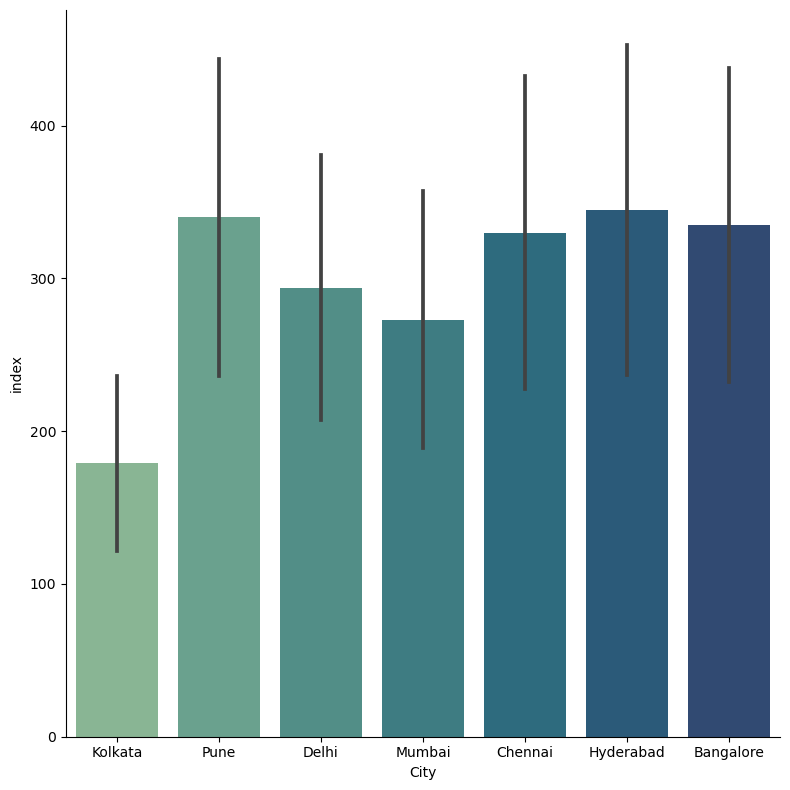

In [259]:

sns.catplot(
    data=df.reset_index(), kind="bar",
    x="City", y="index",legend=True,
    estimator='count',
    errorbar="sd", palette="crest", height=8)
plt.show()

In [353]:
df.reset_index().groupby('City')['index'].count().reset_index().sort_values('index',ascending = False)

,City,index
3,Hyderabad,345
6,Pune,340
0,Bangalore,335
1,Chennai,330
2,Delhi,294
5,Mumbai,273
4,Kolkata,179


In [354]:
(df.reset_index().groupby('Specialization')['index'].count().reset_index()).sort_values('index', ascending = False)

,Specialization,index
1,Dentist,299
6,Homeopathy,278
7,Orthopedist,258
4,General Physician,255
5,Gynaecologist,250
3,Dietitian/Nutritionist,233
2,Dermatologist,215
0,Ayurveda,196
8,Psychologist,112


<Axes: xlabel='City', ylabel='count'>

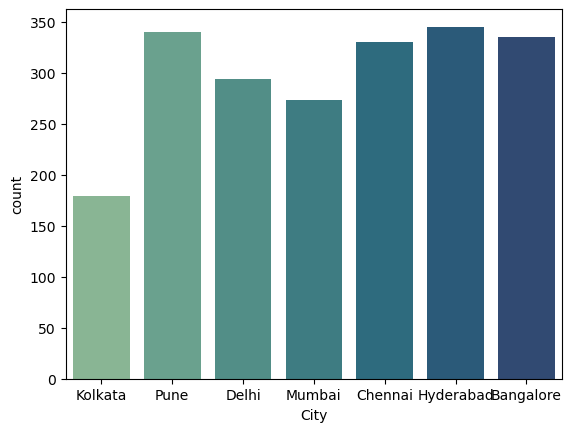

In [261]:
sns.countplot(df,x = 'City',palette='crest')

<Axes: xlabel='City', ylabel='index'>

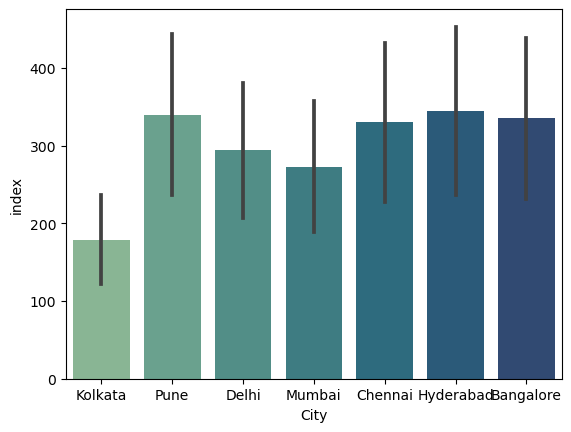

In [262]:
sns.barplot(
    data=df.reset_index(),
    x="City",
    y="index",
    estimator='count',
    errorbar="sd",
    palette="crest",
    edgecolor="none"
    
)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


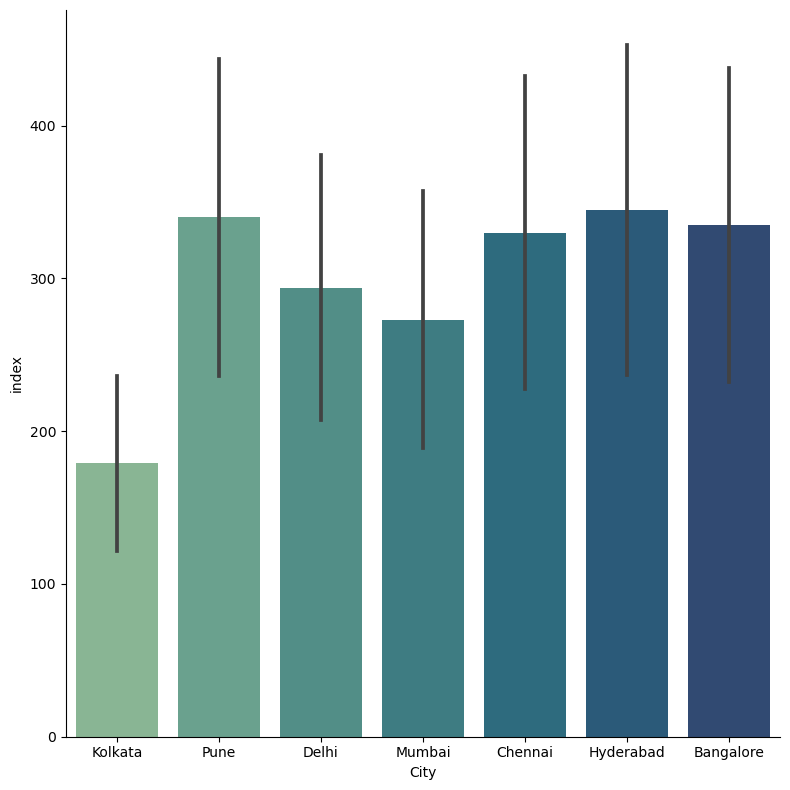

In [263]:
sns.catplot(
    data=df.reset_index(), kind="bar",
    x="City", y="index",
    estimator='count',
    errorbar="sd", palette="crest", height=8)

# Total Fee city wise

<Axes: title={'center': 'Hyderabad'}, xlabel='Total Fee'>

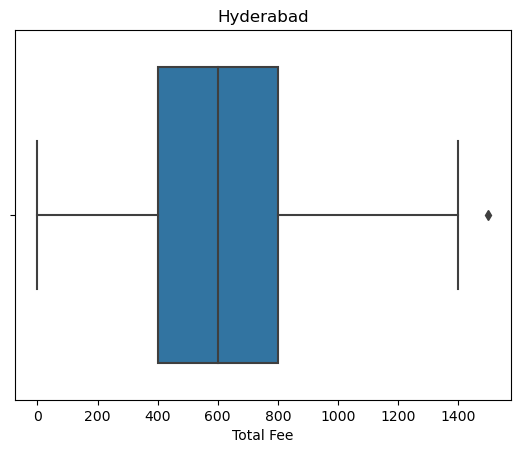

In [264]:
plt.title('Hyderabad')
sns.boxplot(x=df[df['City'] == 'Hyderabad']["Total Fee"])

<Axes: title={'center': 'Mumbai'}, xlabel='Total Fee'>

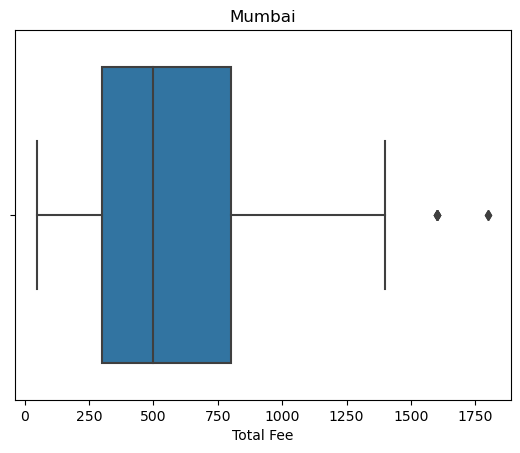

In [265]:
plt.title('Mumbai')
sns.boxplot(x=df[df['City'] == 'Mumbai']["Total Fee"])

<Axes: title={'center': 'Delhi'}, xlabel='Total Fee'>

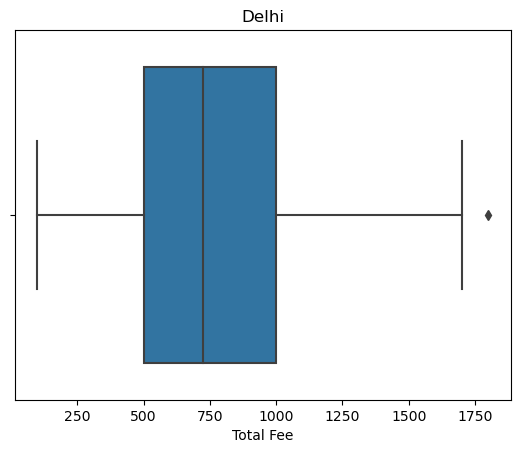

In [266]:
plt.title('Delhi')
sns.boxplot(x=df[df['City'] == 'Delhi']["Total Fee"])

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Axes: title={'center': 'Bangalore'}, xlabel='Total Fee'>

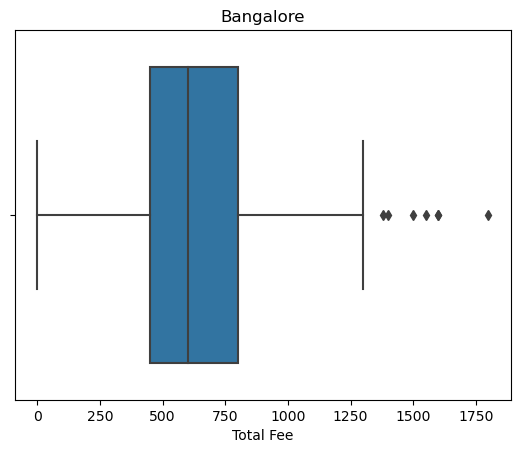

In [267]:

plt.title('Bangalore')
sns.boxplot(x=df[df['City'] == 'Bangalore']["Total Fee"],orient='v')

<Axes: title={'center': 'Chennai'}, xlabel='Total Fee'>

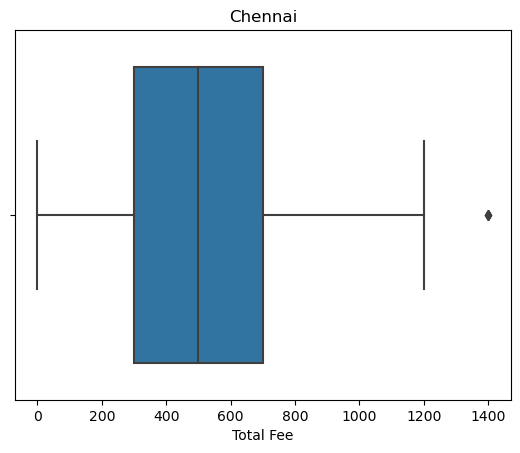

In [268]:
plt.title('Chennai')
sns.boxplot(x=df[df['City'] == 'Chennai']["Total Fee"])

<Axes: title={'center': 'Pune'}, xlabel='Total Fee'>

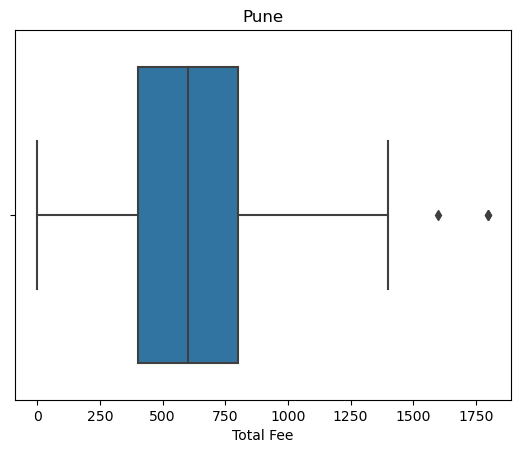

In [269]:
plt.title('Pune')
sns.boxplot(x=df[df['City'] == 'Pune']["Total Fee"])

<Axes: title={'center': 'Kolkata'}, xlabel='Total Fee'>

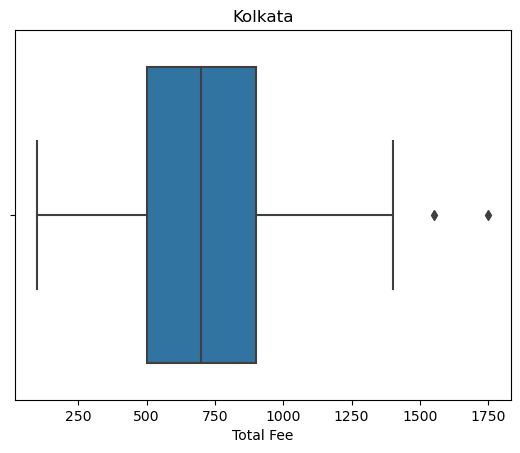

In [270]:
plt.title('Kolkata')
sns.boxplot(x=df[df['City'] == 'Kolkata']["Total Fee"])

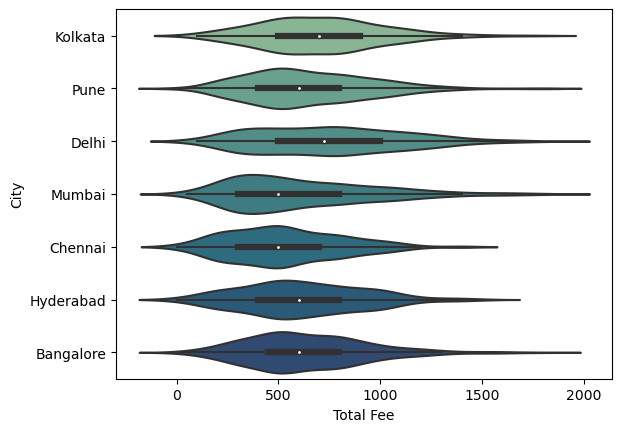

In [271]:
sns.violinplot(x=df["Total Fee"], y=df["City"] ,palette='crest')
plt.show()

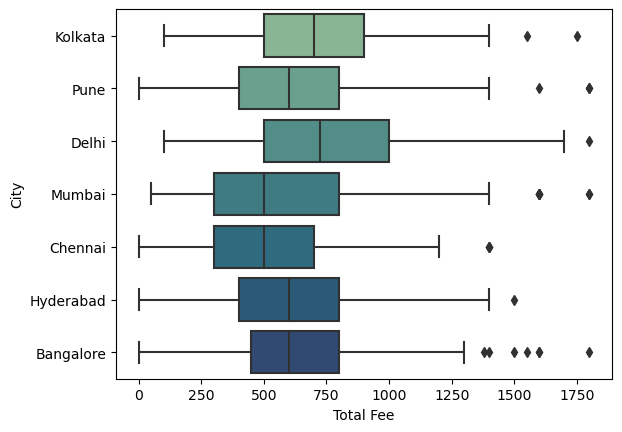

In [272]:
sns.boxplot(x=df["Total Fee"], y=df["City"] ,palette='crest')
plt.show()

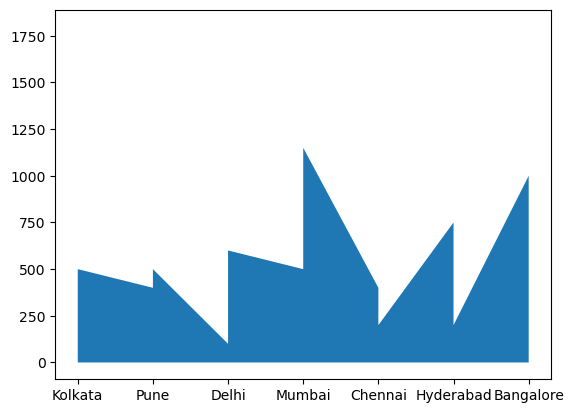

In [273]:
plt.fill_between(x = df['City'], y1= df['Total Fee'])
plt.show()

In [357]:
df.pivot_table(values='Total Fee', index='Specialization', aggfunc='mean').sort_values('Total Fee')

,Total Fee
Specialization,
Dentist,461.739130
Ayurveda,581.938776
General Physician,621.772549
Psychologist,637.285714
Orthopedist,651.569767
Homeopathy,651.938849
Dietitian/Nutritionist,671.622318
Gynaecologist,726.996000
Dermatologist,767.190698


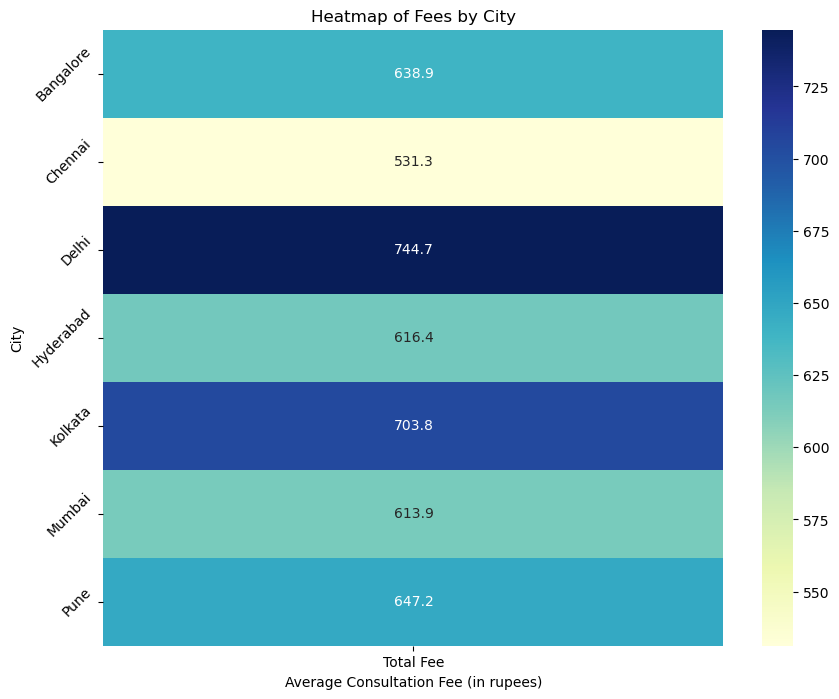

In [275]:

# Pivot the DataFrame to prepare for heatmap
heatmap_data = df.pivot_table(values='Total Fee', index='City', aggfunc='mean')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Heatmap of Fees by City')
plt.xlabel('Average Consultation Fee (in rupees)')
plt.ylabel('City')
plt.yticks(rotation = 45)
plt.show()

In [276]:
df.reset_index().pivot_table

<bound method DataFrame.pivot_table of       index                       Name Specialization  Experience (in years)  \
0         0           Dr. Kaustubh Das        Dentist                   22.0   
1         1           Dr. Asif Naushad        Dentist                   19.0   
2         2  Dr. Prabhjeet Singh Sethi        Dentist                   24.0   
3         3     Dr. Sanket Chakraverty        Dentist                   15.0   
4         4         Dr. Subhajit Dutta        Dentist                   13.0   
...     ...                        ...            ...                    ...   
2091   2225            Dr. Vinodh R.S.       Ayurveda                   22.0   
2092   2227    Dr. Niveditha Shree K N       Ayurveda                   12.0   
2093   2229            Dr. Sumedha K A       Ayurveda                   11.0   
2094   2230    Dr. Prema Jyothi Fraser       Ayurveda                    8.0   
2095   2231  Dr. Kavya Kadapi Kossambe       Ayurveda                    6.0   



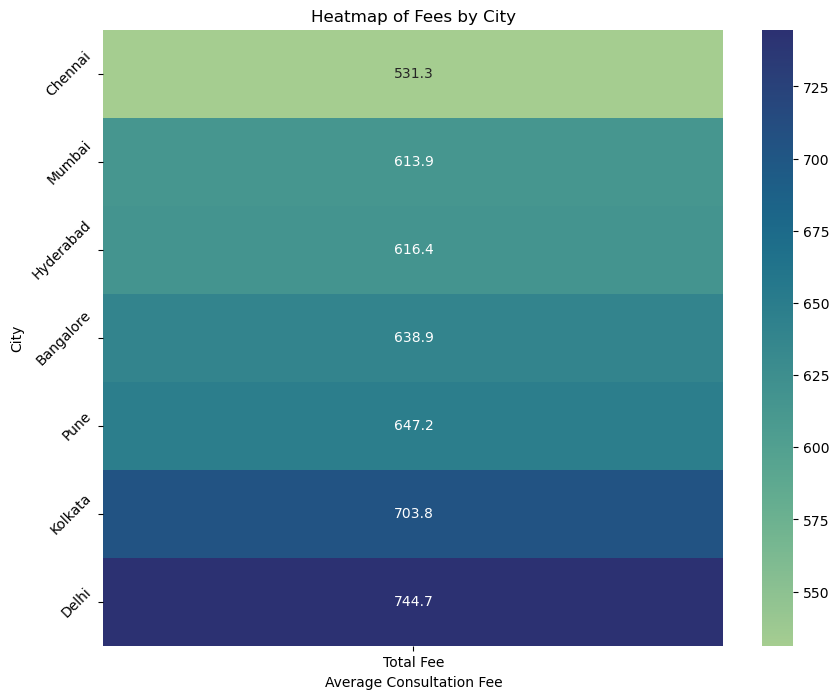

In [277]:
heatmap_data = df.pivot_table(values='Total Fee', index='City', aggfunc='mean').sort_values('Total Fee')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='crest', fmt=".1f")
plt.title('Heatmap of Fees by City')
plt.xlabel('Average Consultation Fee')
plt.ylabel('City')
plt.yticks(rotation = 45)
plt.show()

# Total Fee Specialization wise

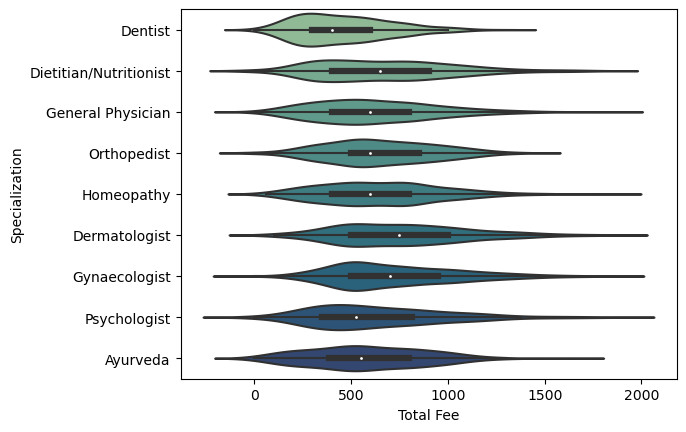

In [278]:
sns.violinplot(x=df["Total Fee"], y=df["Specialization"] ,palette='crest')
plt.show()

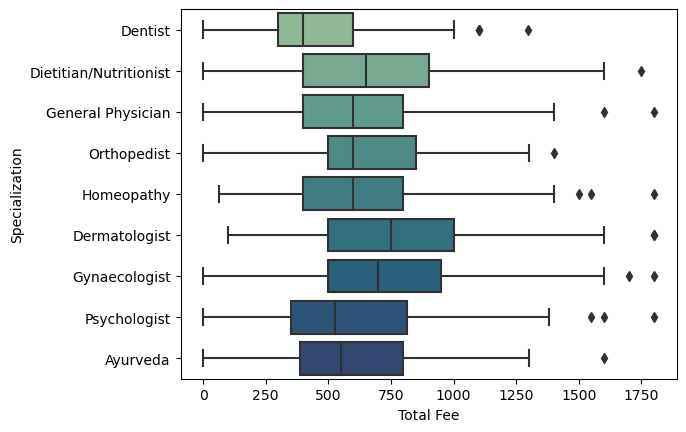

In [279]:
sns.boxplot(x=df["Total Fee"], y=df["Specialization"] ,palette='crest')
plt.show()

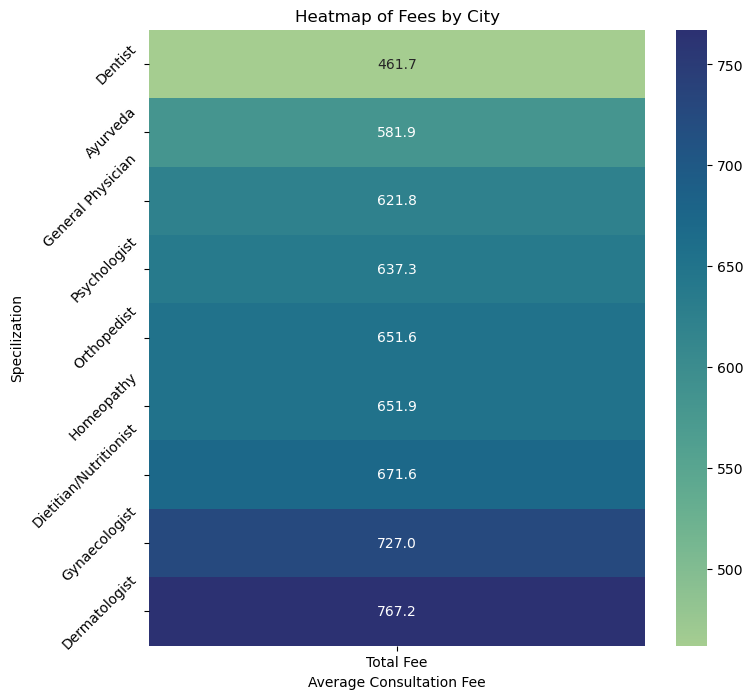

In [280]:
heatmap_data = df.pivot_table(values='Total Fee', index=['Specialization'], aggfunc='mean').sort_values('Total Fee')

# Create heatmap
plt.figure(figsize=(8,8))
sns.heatmap(heatmap_data, annot=True, cmap='crest', fmt=".1f")
plt.title('Heatmap of Fees by City')
plt.xlabel('Average Consultation Fee')
plt.ylabel('Specilization')
plt.yticks(rotation = 45)
plt.show()

# Full Univariate Analysis Categorical

### countplot
### treemap
### pie chart

<Axes: title={'center': 'count of each specialization'}, xlabel='Specialization', ylabel='count'>

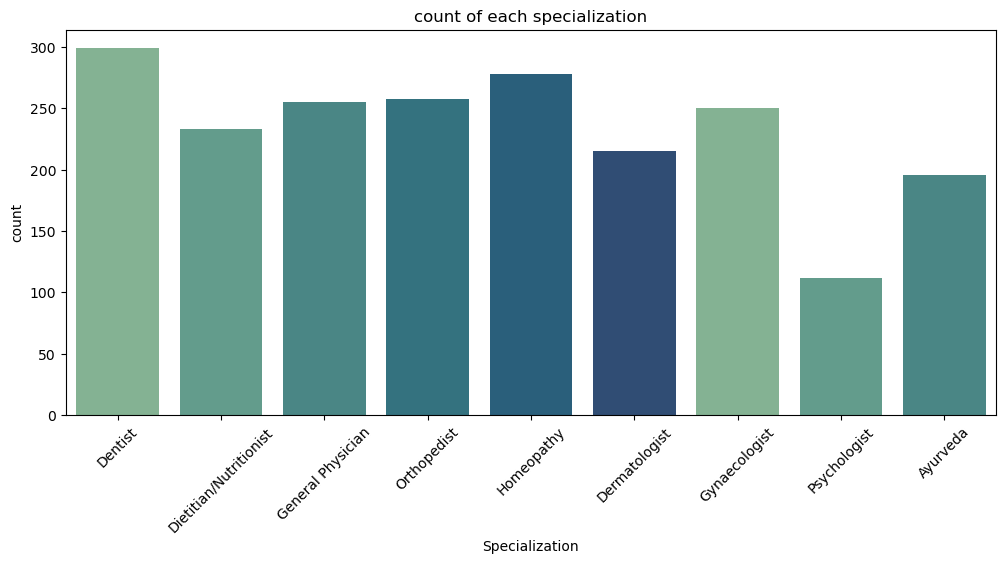

In [281]:
# count plot

color = sns.color_palette("crest")
plt.figure(figsize=(12,5))
plt.title('count of each specialization')
plt.ylabel('Name of Specialization')
plt.xlabel('Number of doctors')
plt.xticks(rotation = 45)
sns.countplot(df,x = 'Specialization', palette = color)

- highest = dentist
- lowest = Psychologist

In [ ]:
df.pivot_table(values='Total Fee', index='Speci', aggfunc='mean').sort_values('Total Fee')

In [282]:
!pip install squarify

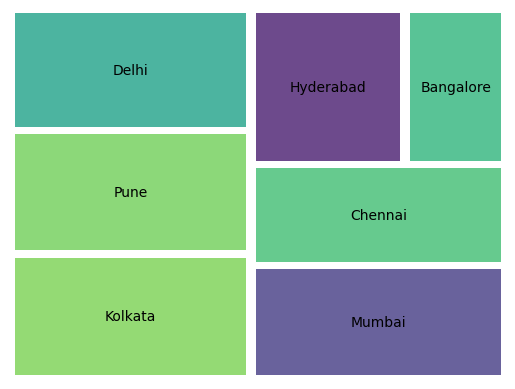

In [347]:
# tree map
import squarify
squarify.plot(sizes=df['City'].value_counts(), label=df['City'].unique(), alpha= .8, pad = True)
plt.axis('off')
plt.show()

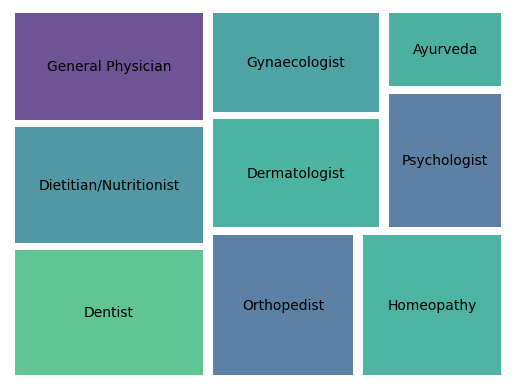

In [355]:
# tree map
import squarify
squarify.plot(sizes=df['Specialization'].value_counts(), label=df['Specialization'].unique(), alpha= .8, pad = True)
plt.axis('off')
plt.show()

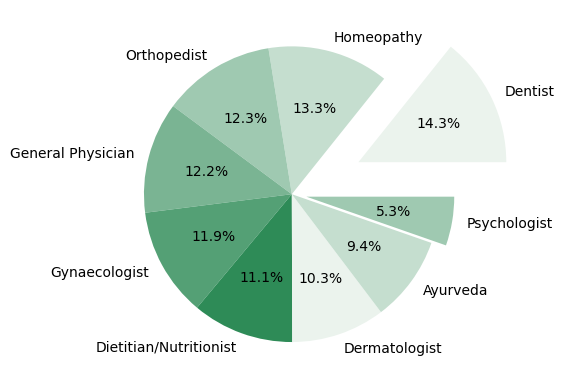

In [284]:
a = pd.DataFrame(df["Specialization"].value_counts())
colors = sns.light_palette("seagreen")
plt.pie(df["Specialization"].value_counts(), labels = a.index,
        colors=colors, autopct='%.1f%%',explode = [0.5,0,0,0,0,0,0,0,0.1])
plt.show()

In [285]:
len(df[df['City'] == 'Hyderabad']['Number of Hrs. Available'].unique())

30

In [286]:
len(df[df['City'] == 'Kolkata']['Number of Hrs. Available'].unique())

23

In [287]:
df.columns

Index(['Name', 'Specialization', 'Experience (in years)', 'Education',
       'Fee at clinic', 'Online Fee', 'Clinic Name', 'Area', 'Available From',
       'Available Till', 'City', 'Total Fee', 'Number of Hrs. Available'],
      dtype='object')

In [288]:
df

,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
0,Dr. Kaustubh Das,Dentist,22.0,"BDS, MFDS RCPS(Glasgow), FFD RCS (IRE)",500.0,0.0,ASPIRE CLINIC,Kolkata,10:00:00,19:00:00,Kolkata,500.0,09:00
1,Dr. Asif Naushad,Dentist,19.0,"House Surgeon, House Surgeon, House Surgeon, BDS",300.0,300.0,JM DENTAL,Kolkata,10:00:00,21:00:00,Kolkata,600.0,11:00
2,Dr. Prabhjeet Singh Sethi,Dentist,24.0,Certified Implantologist,500.0,350.0,Dontia Dental Care,Kolkata,15:00:00,20:00:00,Kolkata,850.0,05:00
3,Dr. Sanket Chakraverty,Dentist,15.0,"MDS Prosthodontics, B.D.S",300.0,300.0,Teeth Care Multispeciality Dental Clinic,Rajarhat Road,16:30:00,20:30:00,Kolkata,600.0,04:00
4,Dr. Subhajit Dutta,Dentist,13.0,BDS,500.0,300.0,SIGNATURE SMILE Dental Clinic,Kolkata,17:00:00,21:00:00,Kolkata,800.0,04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Dr. Vinodh R.S.,Ayurveda,22.0,"MBBS, MD - Physiology",100.0,250.0,Sri Marudhar Clinic,Bangalore,19:30:00,21:30:00,Bangalore,350.0,02:00
2227,Dr. Niveditha Shree K N,Ayurveda,12.0,Bachelor of Ayurvedic Medicine & Surgery,200.0,100.0,Ashwini Ayurveda,Banashankari,18:30:00,22:00:00,Bangalore,300.0,03:30
2229,Dr. Sumedha K A,Ayurveda,11.0,"BAMS, M.D Panchakarma",300.0,200.0,Shathayu Ayurveda clinic,AECS Layout,09:00:00,19:30:00,Bangalore,500.0,10:30
2230,Dr. Prema Jyothi Fraser,Ayurveda,8.0,MD,200.0,200.0,Sri Mahima Multispecality Homoeo Clinic,Jayanagar,17:00:00,20:30:00,Bangalore,400.0,03:30


### City

<Axes: title={'center': 'count of doctors in each city'}, xlabel='City', ylabel='count'>

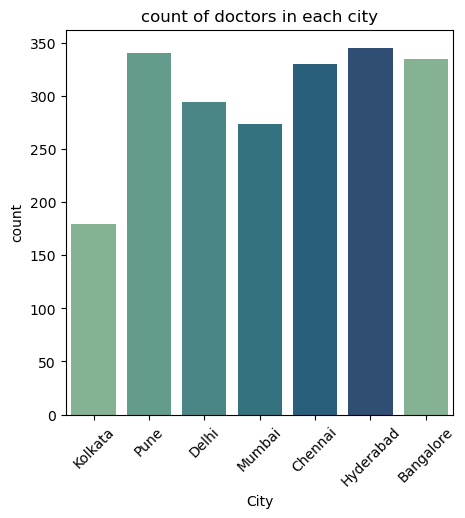

In [356]:
# count plot

# count plot

color = sns.color_palette("crest")
plt.figure(figsize=(5,5))
plt.title('count of doctors in each city')

plt.xlabel('Name of the city')
plt.xticks(rotation = 45)
sns.countplot(df,x = 'City', palette = color)

  - Most number : Hyderabad
  - Least number : Kolkata

In [290]:
df.reset_index().groupby('City')['index'].count()

City
Bangalore    335
Chennai      330
Delhi        294
Hyderabad    345
Kolkata      179
Mumbai       273
Pune         340
Name: index, dtype: int64

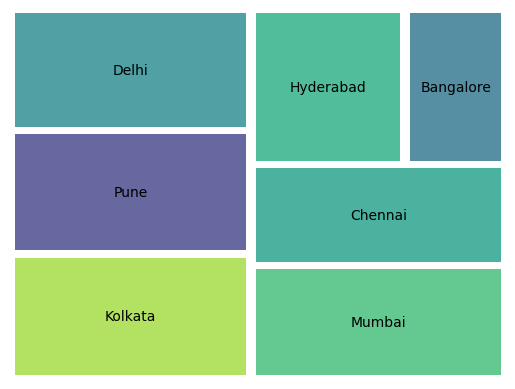

In [291]:
# tree map
import squarify
squarify.plot(sizes=df['City'].value_counts(), label=df['City'].unique(), alpha= .8, pad = True)
plt.axis('off')
plt.show()

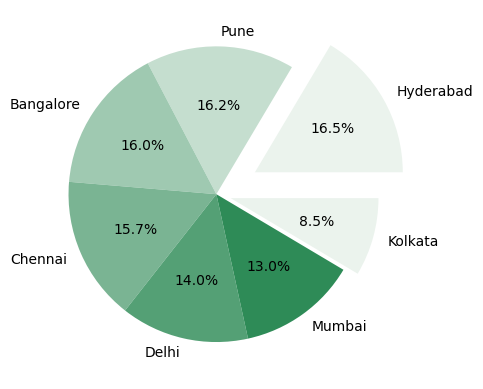

In [292]:

a = pd.DataFrame(df["City"].value_counts())
colors = sns.light_palette("seagreen")
plt.pie(df["City"].value_counts(), labels = a.index,
        colors=colors, autopct='%.1f%%', explode = [0.3,0,0,0,0,0,0.1])
plt.show()

In [293]:
df.reset_index().groupby('City')['index'].count()

City
Bangalore    335
Chennai      330
Delhi        294
Hyderabad    345
Kolkata      179
Mumbai       273
Pune         340
Name: index, dtype: int64

# Hours

In [294]:
df

,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
0,Dr. Kaustubh Das,Dentist,22.0,"BDS, MFDS RCPS(Glasgow), FFD RCS (IRE)",500.0,0.0,ASPIRE CLINIC,Kolkata,10:00:00,19:00:00,Kolkata,500.0,09:00
1,Dr. Asif Naushad,Dentist,19.0,"House Surgeon, House Surgeon, House Surgeon, BDS",300.0,300.0,JM DENTAL,Kolkata,10:00:00,21:00:00,Kolkata,600.0,11:00
2,Dr. Prabhjeet Singh Sethi,Dentist,24.0,Certified Implantologist,500.0,350.0,Dontia Dental Care,Kolkata,15:00:00,20:00:00,Kolkata,850.0,05:00
3,Dr. Sanket Chakraverty,Dentist,15.0,"MDS Prosthodontics, B.D.S",300.0,300.0,Teeth Care Multispeciality Dental Clinic,Rajarhat Road,16:30:00,20:30:00,Kolkata,600.0,04:00
4,Dr. Subhajit Dutta,Dentist,13.0,BDS,500.0,300.0,SIGNATURE SMILE Dental Clinic,Kolkata,17:00:00,21:00:00,Kolkata,800.0,04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Dr. Vinodh R.S.,Ayurveda,22.0,"MBBS, MD - Physiology",100.0,250.0,Sri Marudhar Clinic,Bangalore,19:30:00,21:30:00,Bangalore,350.0,02:00
2227,Dr. Niveditha Shree K N,Ayurveda,12.0,Bachelor of Ayurvedic Medicine & Surgery,200.0,100.0,Ashwini Ayurveda,Banashankari,18:30:00,22:00:00,Bangalore,300.0,03:30
2229,Dr. Sumedha K A,Ayurveda,11.0,"BAMS, M.D Panchakarma",300.0,200.0,Shathayu Ayurveda clinic,AECS Layout,09:00:00,19:30:00,Bangalore,500.0,10:30
2230,Dr. Prema Jyothi Fraser,Ayurveda,8.0,MD,200.0,200.0,Sri Mahima Multispecality Homoeo Clinic,Jayanagar,17:00:00,20:30:00,Bangalore,400.0,03:30


C:\Users\DELL\AppData\Local\Temp\ipykernel_16320\3917225262.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sns.histplot(data=pd.to_datetime(df["Number of Hrs. Available"]).dt.hour,bins=[0,4,8,12,16,20,24], kde = True, color = 'lightgreen')


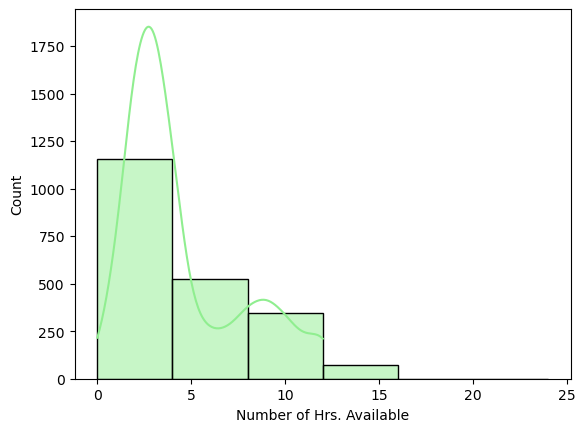

In [295]:
sns.histplot(data=pd.to_datetime(df["Number of Hrs. Available"]).dt.hour,bins=[0,4,8,12,16,20,24], kde = True, color = 'lightgreen')
plt.show()

In [296]:
df2 = df.copy()
hh = pd.DataFrame(df2.reset_index().groupby("Number of Hrs. Available")["index"].count())
hh.reset_index(inplace = True)

hh.columns

Index(['Number of Hrs. Available', 'index'], dtype='object')

In [297]:
hh


,Number of Hrs. Available,index
0,00:00,15
1,00:15,3
2,00:30,14
3,00:45,1
4,01:00,90
5,01:15,1
6,01:30,70
7,01:45,2
8,02:00,324
9,02:15,4


C:\Users\DELL\AppData\Local\Temp\ipykernel_16320\691937549.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hh['Number of Hrs. Available'] = pd.to_datetime(hh['Number of Hrs. Available'])


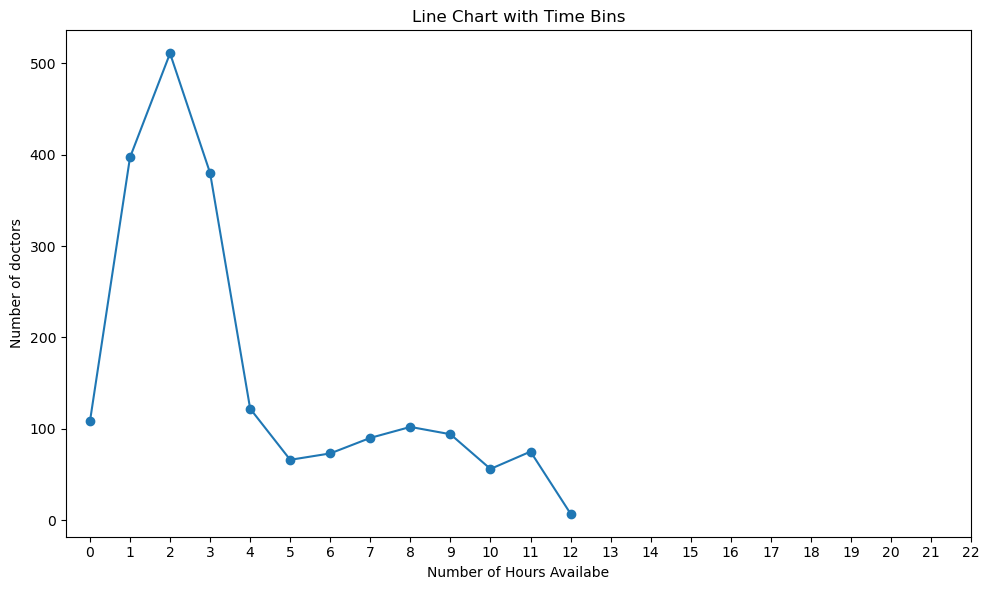

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame with time data in HH:MM format



# Convert 'Time' column to datetime
hh['Number of Hrs. Available'] = pd.to_datetime(hh['Number of Hrs. Available'])

# Define time bins
bins = pd.date_range(start='00:00', end='23:59', freq='1H')

# Group data by time bins and aggregate values (for example, sum)
hh['Time Bin'] = pd.cut(hh['Number of Hrs. Available'], bins=bins, labels=False)
result = hh.groupby('Time Bin')['index'].sum().reset_index()
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(result['Time Bin'], result['index'], marker='o')

plt.xlabel('Number of Hours Availabe')
plt.ylabel('Number of doctors')
plt.title('Line Chart with Time Bins')
plt.xticks(np.arange(0, len(bins)-1), np.arange(0, len(bins)-1))  # Set x-axis ticks to number of hours
plt.tight_layout()

### try

In [299]:
pd.DataFrame(df2.reset_index().groupby(["Number of Hrs. Available","City"])["index"].count()).reset_index().columns

Index(['Number of Hrs. Available', 'City', 'index'], dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16320\3568931150.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hh['Number of Hrs. Available'] = pd.to_datetime(hh['Number of Hrs. Available'])


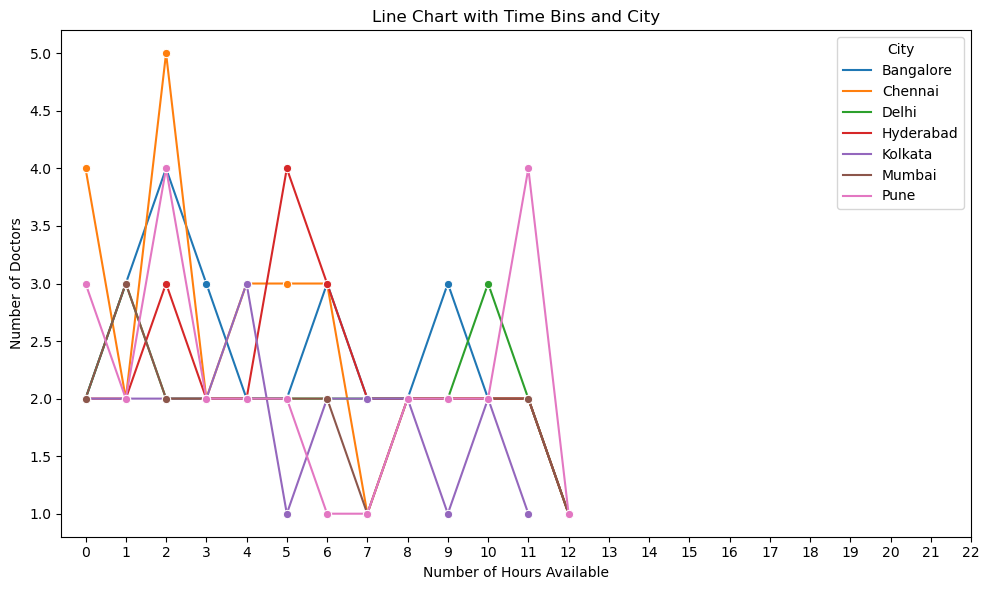

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
hh = pd.DataFrame(df2.reset_index().groupby(["Number of Hrs. Available","City"])["index"].count()).reset_index()

# Convert 'Number of Hrs. Available' column to datetime
hh['Number of Hrs. Available'] = pd.to_datetime(hh['Number of Hrs. Available'])

# Define time bins
bins = pd.date_range(start='00:00', end='23:59', freq='1H')

# Group data by time bins and aggregate values (for example, count)
hh['Time Bin'] = pd.cut(hh['Number of Hrs. Available'], bins=bins, labels=False)
result = hh.groupby(['Time Bin', 'City']).size().reset_index(name='Count')

# Plot the line chart with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=result, x='Time Bin', y='Count', hue='City', marker='o')

plt.xlabel('Number of Hours Available')
plt.ylabel('Number of Doctors')
plt.title('Line Chart with Time Bins and City')
plt.xticks(np.arange(0, len(bins)-1), np.arange(0, len(bins)-1))  # Set x-axis ticks to number of hours
plt.tight_layout()
plt.show()


# Available from

In [301]:
df.reset_index().groupby('Available From')['index'].count().sort_values(ascending = False).reset_index().head()

,Available From,index
0,10:00:00,428
1,17:00:00,234
2,09:00:00,221
3,18:00:00,190
4,11:00:00,183


- In above dataframe top 5 appointment starting times with most number of doctors available

In [302]:
df.reset_index().groupby('Available From')['index'].count().sort_values(ascending = False).reset_index().tail()

,Available From,index
45,10:45:00,1
46,09:31:00,1
47,08:45:00,1
48,07:45:00,1
49,22:00:00,1


- In above dataframe top 5 appointment starting times with least number of doctors available

In [303]:
af = df.reset_index().groupby('Available From')['index'].count().reset_index()

In [304]:
# df.reset_index().groupby('Available From')['index'].count().sort_values(ascending = False).reset_index()

<Axes: xlabel='Starting hours', ylabel='Number of doctors'>

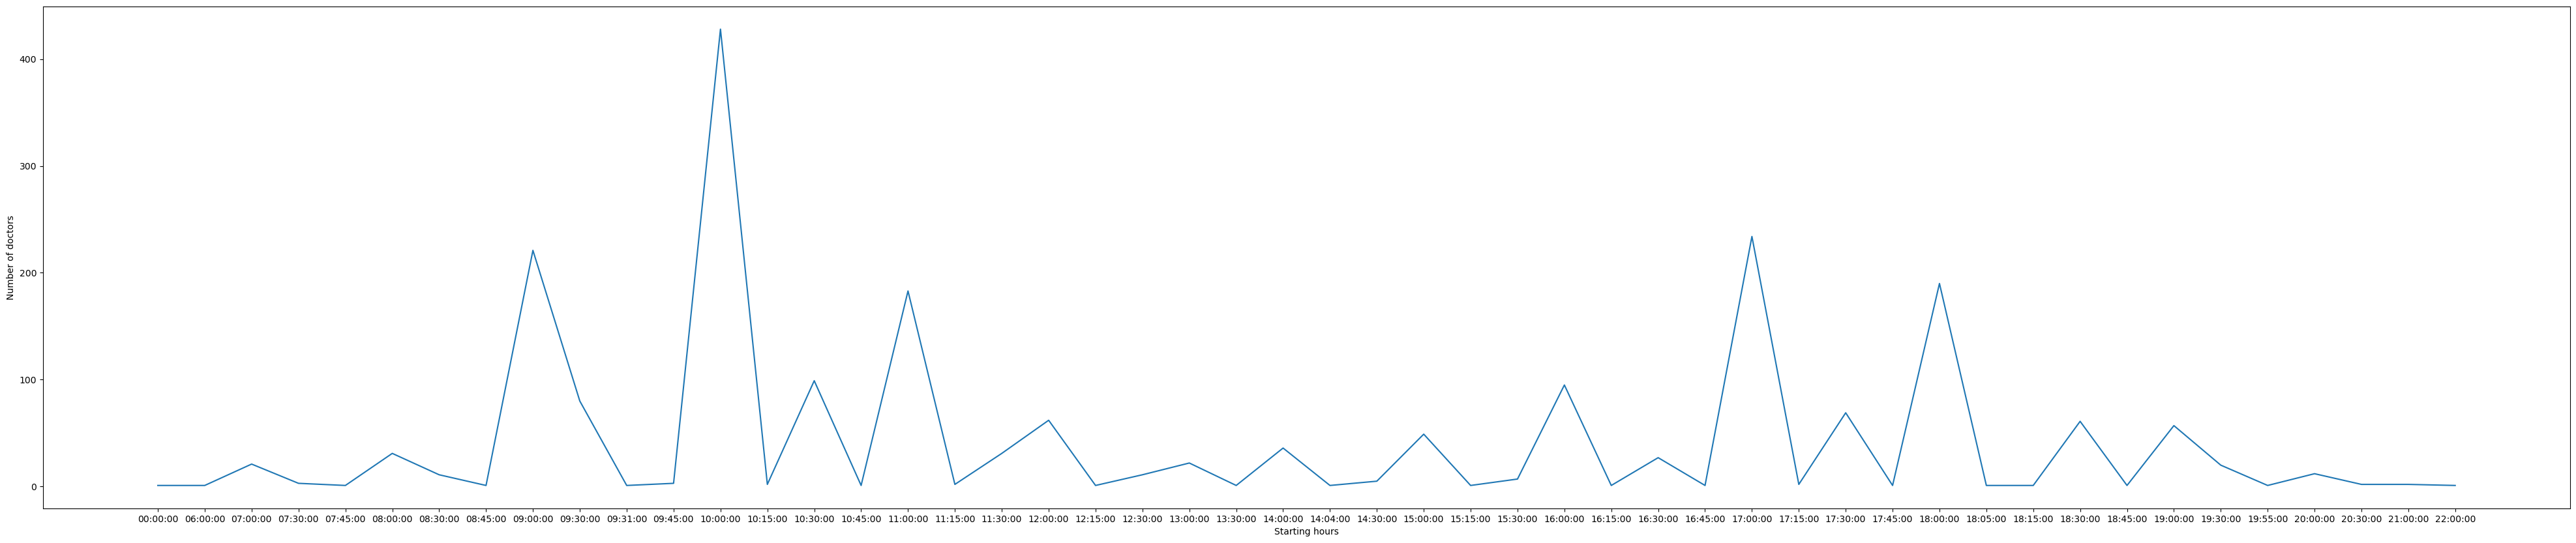

In [305]:
plt.figure(figsize=(50,10))
plt.xlabel('Starting hours')
plt.ylabel('Number of doctors')
sns.lineplot(af,x = 'Available From', y = 'index')

- peak number of availabilty starts from 10 am 
- and less between afternoon hours 12 pm to 3pm and after 9 pm

# Available from City wise

In [306]:
af = df.reset_index().groupby(['Available From','City'])['index'].count().reset_index()

In [307]:
af.columns

Index(['Available From', 'City', 'index'], dtype='object')

In [308]:
df.reset_index().pivot_table(values = 'index', index = ['City','Available From'], aggfunc = ['count']).sort_values(('count','index'),ascending = False)

count
                         index
City      Available From      
Hyderabad 10:00:00          90
Bangalore 10:00:00          73
Pune      10:00:00          70
Chennai   10:00:00          59
Delhi     10:00:00          56
...                        ...
Mumbai    18:45:00           1
          19:30:00           1
Kolkata   10:45:00           1
Delhi     18:15:00           1
Bangalore 07:45:00           1

[192 rows x 1 columns]

<Axes: xlabel='Starting hours', ylabel='Number of doctors'>

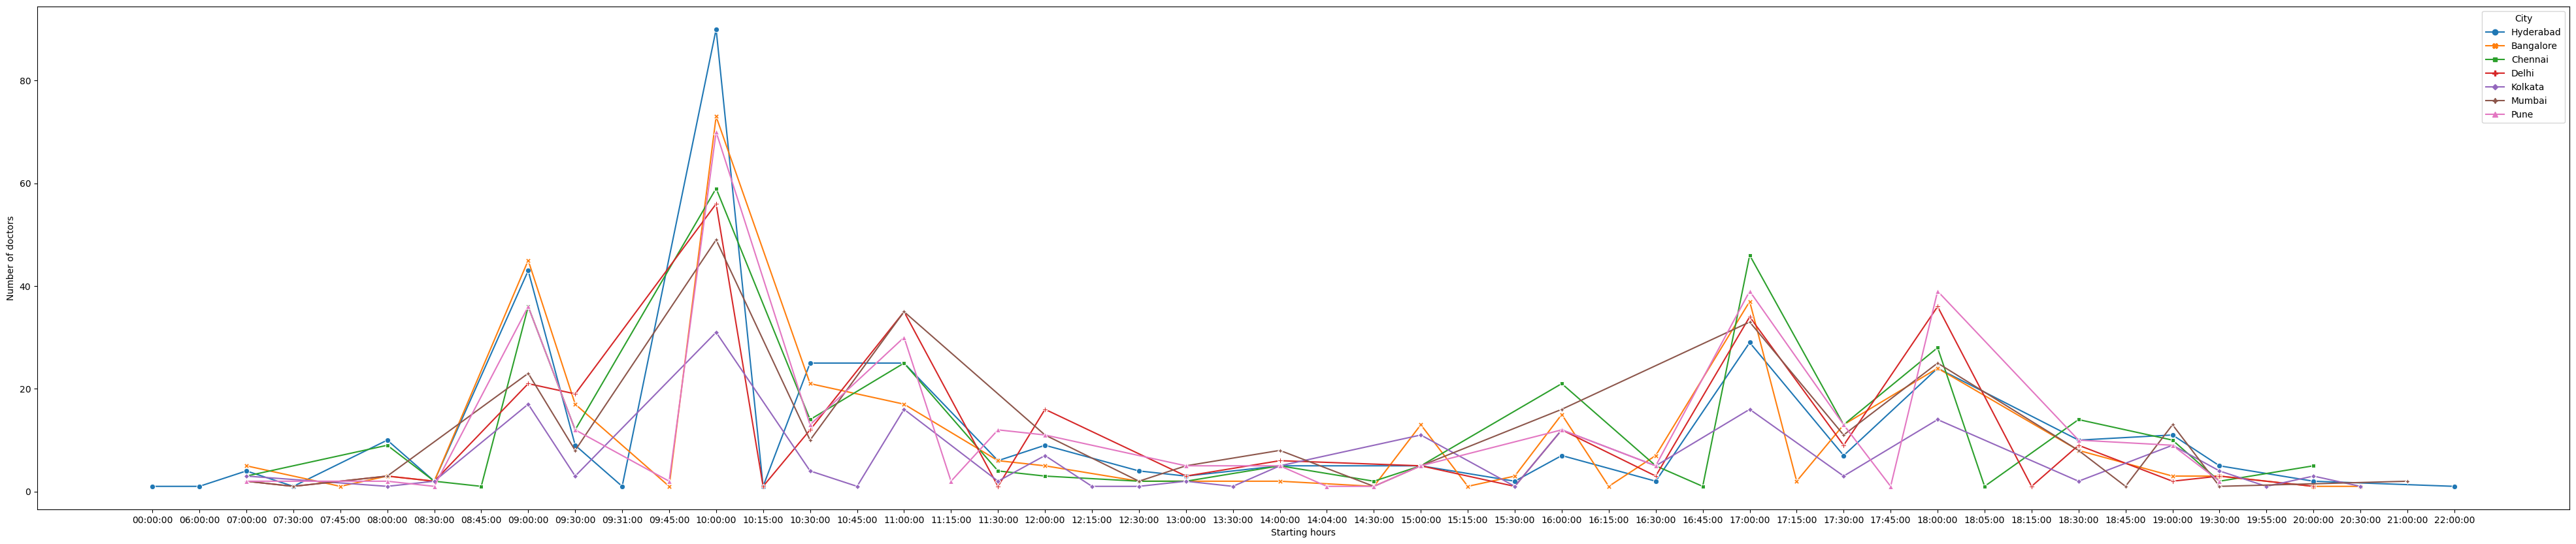

In [309]:
plt.figure(figsize=(50,10))
plt.xlabel('Starting hours')
plt.ylabel('Number of doctors')
sns.lineplot(af,x = 'Available From', y = 'index', hue = 'City', style='City', markers=True, dashes=False)

- Hyderabad: Peak hours appear to be around mid-morning and early evening. Non-peak hours are in the late evening.
- Bangalore: Shows peaks in the morning and again in the early evening. Non-peak hours are in the afternoon and late evening.
- Chennai: Similar to Bangalore, with peaks in the morning and early evening. Non-peak hours are in the afternoon and late evening.
- Delhi: Peaks in the morning and early evening, with non-peak hours in the late evening.
- Kolkata: Peaks in the morning and early evening. Non-peak hours are in the afternoon and late evening.
- Mumbai: Peaks in the morning and early evening. Non-peak hours are in the afternoon and late evening.
- Pune: Peaks in the morning and early evening. Non-peak hours are in the afternoon and late evening.

# Available Till

In [310]:
df.reset_index().groupby('Available Till')['index'].count().sort_values(ascending = False).reset_index().head()

,Available Till,index
0,20:00:00,299
1,21:00:00,291
2,13:00:00,188
3,14:00:00,185
4,20:30:00,151


- In above dataframe top 5 appointement ending times as per number of doctors

In [311]:
df.reset_index().groupby('Available Till')['index'].count().sort_values(ascending = False).reset_index().tail()

,Available Till,index
44,12:45:00,1
45,16:45:00,1
46,14:31:00,1
47,14:45:00,1
48,00:00:00,1


- In above dataframe top 5 appointment ending  times with least number of doctors closing

In [312]:
at = df.reset_index().groupby('Available Till')['index'].count().reset_index()

<Axes: xlabel='Starting hours', ylabel='Number of doctors'>

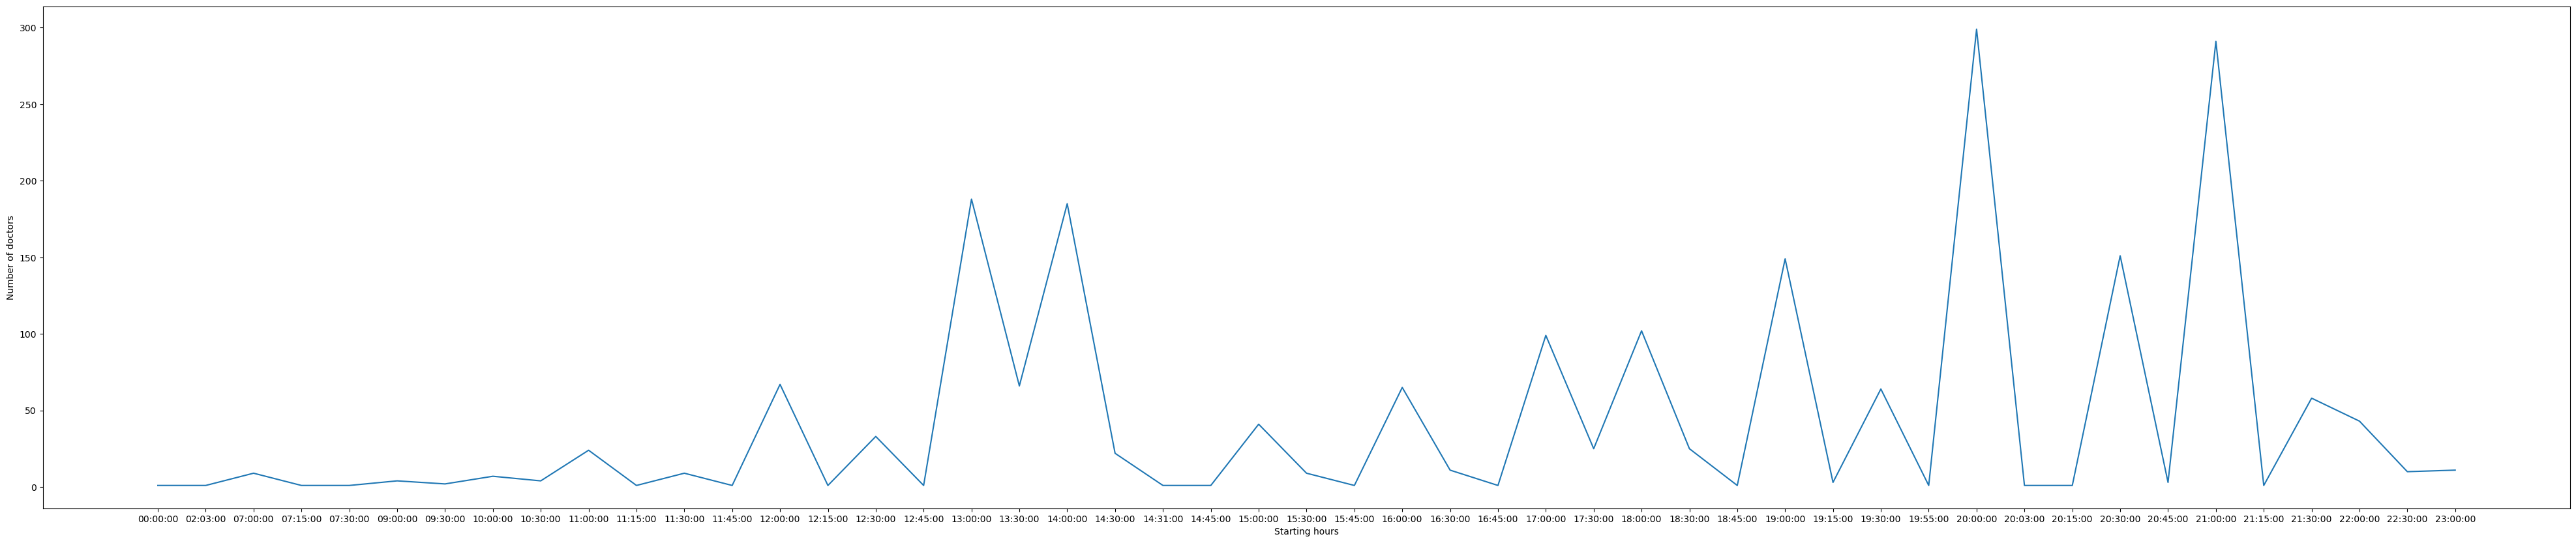

In [313]:
plt.figure(figsize=(50,10))
plt.xlabel('Starting hours')
plt.ylabel('Number of doctors')
sns.lineplot(at,x = 'Available Till', y = 'index')

- peak number of availabilty ends at 8 pm and 9 pm
- and less between morning hours till 11.30 am

In [314]:
df

,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
0,Dr. Kaustubh Das,Dentist,22.0,"BDS, MFDS RCPS(Glasgow), FFD RCS (IRE)",500.0,0.0,ASPIRE CLINIC,Kolkata,10:00:00,19:00:00,Kolkata,500.0,09:00
1,Dr. Asif Naushad,Dentist,19.0,"House Surgeon, House Surgeon, House Surgeon, BDS",300.0,300.0,JM DENTAL,Kolkata,10:00:00,21:00:00,Kolkata,600.0,11:00
2,Dr. Prabhjeet Singh Sethi,Dentist,24.0,Certified Implantologist,500.0,350.0,Dontia Dental Care,Kolkata,15:00:00,20:00:00,Kolkata,850.0,05:00
3,Dr. Sanket Chakraverty,Dentist,15.0,"MDS Prosthodontics, B.D.S",300.0,300.0,Teeth Care Multispeciality Dental Clinic,Rajarhat Road,16:30:00,20:30:00,Kolkata,600.0,04:00
4,Dr. Subhajit Dutta,Dentist,13.0,BDS,500.0,300.0,SIGNATURE SMILE Dental Clinic,Kolkata,17:00:00,21:00:00,Kolkata,800.0,04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Dr. Vinodh R.S.,Ayurveda,22.0,"MBBS, MD - Physiology",100.0,250.0,Sri Marudhar Clinic,Bangalore,19:30:00,21:30:00,Bangalore,350.0,02:00
2227,Dr. Niveditha Shree K N,Ayurveda,12.0,Bachelor of Ayurvedic Medicine & Surgery,200.0,100.0,Ashwini Ayurveda,Banashankari,18:30:00,22:00:00,Bangalore,300.0,03:30
2229,Dr. Sumedha K A,Ayurveda,11.0,"BAMS, M.D Panchakarma",300.0,200.0,Shathayu Ayurveda clinic,AECS Layout,09:00:00,19:30:00,Bangalore,500.0,10:30
2230,Dr. Prema Jyothi Fraser,Ayurveda,8.0,MD,200.0,200.0,Sri Mahima Multispecality Homoeo Clinic,Jayanagar,17:00:00,20:30:00,Bangalore,400.0,03:30


# Availble Till (city wise)

In [315]:
at = df.reset_index().groupby(['Available Till','City'])['index'].count().reset_index()

In [316]:
df.reset_index().pivot_table(values = 'index', index = ['City','Available Till'], aggfunc = ['count']).sort_values(('count','index'),ascending = False)

count
                         index
City      Available Till      
Chennai   21:00:00          68
Delhi     20:00:00          58
Hyderabad 20:00:00          53
Pune      21:00:00          52
Hyderabad 21:00:00          47
...                        ...
          23:00:00           1
Chennai   21:15:00           1
Kolkata   07:30:00           1
Chennai   20:15:00           1
Pune      23:00:00           1

[206 rows x 1 columns]

<Axes: xlabel='Ending hours', ylabel='Number of doctors'>

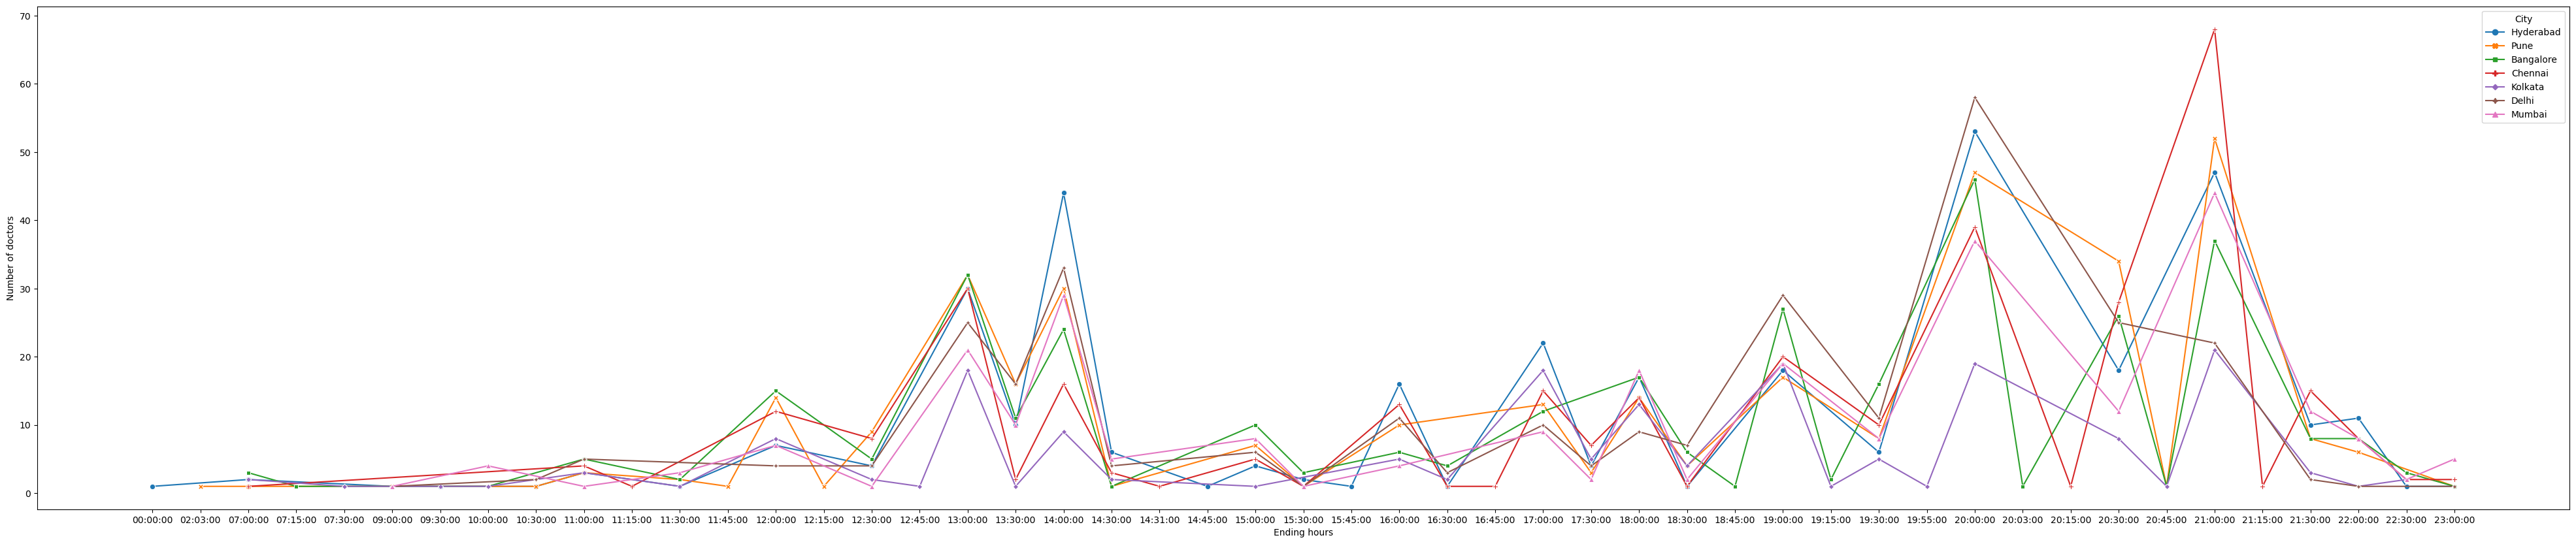

In [317]:
plt.figure(figsize=(50,10))
plt.xlabel('Ending hours')
plt.ylabel('Number of doctors')
sns.lineplot(at,x = 'Available Till', y = 'index', hue = 'City', style='City', markers=True, dashes=False)

Hyderabad:

    Peak hours: Around 13:00-14:00 and 19:00-20:00
    Non-peak hours: Early morning (before 08:00) and late evening (after 21:00)
Pune:

    Peak hours: Around 13:00-14:00 and 19:00-20:00
    Non-peak hours: Early morning (before 08:00) and late evening (after 21:00)
Bengaluru (Bangalore):

    Peak hours: Around 13:00-14:00 and 19:00-20:00
    Non-peak hours: Early morning (before 08:00) and late evening (after 21:00)
Chennai:

    Peak hours: Around 13:00-14:00 and 19:00-20:00
    Non-peak hours: Early morning (before 08:00) and late evening (after 21:00)
Delhi:

    Peak hours: Around 13:00-14:00 and 19:00-20:00
    Non-peak hours: Early morning (before 08:00) and late evening (after 21:00)
Kolkata:

    Peak hours: Around 13:00-14:00 and 19:00-20:00
    Non-peak hours: Early morning (before 08:00) and late evening (after 21:00)
Mumbai:

    Peak hours: Around 13:00-14:00 and 19:00-20:00
    Non-peak hours: Early morning (before 08:00) and late evening (after 21:00)

# Top 5  

> incomplete input

### Dentist

In [318]:
dentist = df[df['Specialization'] == 'Dentist']
exp_mean = dentist['Experience (in years)'].mean()
fee_mean = dentist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dentist[(dentist['Experience (in years)'] > exp_mean) & (dentist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  18.588628762541806
Total Fee mean :  461.7391304347826


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
223,Dr. Aashish Mathesul Orthodontist,Dentist,22.0,MDS - Orthodontics,100.0,300.0,Invisalign Invisible Braces Orthodontic Dental...,Kalyani Nagar,17:30:00,20:30:00,Pune,400.0,03:00
573,Dr. Prof.Asheesh Gupta,Dentist,24.0,"MDS, Certificate in implantology, MDS",200.0,200.0,Dr. Gupta's Dental & Braces Clinic,Rohini,11:00:00,13:30:00,Delhi,400.0,02:30
1163,Dr. P.Lakshmipathy,Dentist,23.0,MDS - Orthodontics,300.0,100.0,rishii dental care,Nandanam,17:00:00,20:30:00,Chennai,400.0,03:30
1888,Dr. Rashmi Raghavan,Dentist,27.0,"BDS, MDS - Periodontics",300.0,100.0,Family Dental Care,Bangalore,09:00:00,13:00:00,Bangalore,400.0,04:00
41,Dr. Aruna Gupta,Dentist,40.0,"BDS, Endo",200.0,200.0,Dental Surgeon,Kankurgachi,09:00:00,16:00:00,Kolkata,400.0,07:00


In [319]:
dentist[(dentist['Experience (in years)'] > exp_mean) & (dentist['Total Fee'] < fee_mean)].sort_values(['Experience (in years)','Total Fee']).tail(10)


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
1504,Dr. Y S Reddy,Dentist,27.0,BDS,300.0,100.0,YSR Speciality dental clinic,Ameerpet,17:30:00,20:30:00,Hyderabad,400.0,03:00
1888,Dr. Rashmi Raghavan,Dentist,27.0,"BDS, MDS - Periodontics",300.0,100.0,Family Dental Care,Bangalore,09:00:00,13:00:00,Bangalore,400.0,04:00
208,Dr. Sameer Bhandari,Dentist,28.0,BDS,200.0,0.0,Bhandari Dental Clinic,Pune,10:00:00,18:00:00,Pune,200.0,08:00
858,Dr. Reshma Mehta,Dentist,28.0,BDS,0.0,200.0,Family Dental Care Clinic,Goregaon West,09:30:00,13:30:00,Mumbai,200.0,04:00
1902,Dr. Sharadha Bai,Dentist,28.0,BDS,200.0,100.0,Sai Ram Abhayahasta Multispeciality Dental care,Kaggadasapura,09:00:00,12:00:00,Bangalore,300.0,03:00
574,Dr. Apoorv Mittal,Dentist,29.0,"Bachelor of Dental Surgery, Diploma in Hospita...",100.0,100.0,Shivam Hospital,Rohini Sector 16,12:00:00,14:00:00,Delhi,200.0,02:00
587,Dr. Adosh Lall,Dentist,30.0,"MDS , BDS",300.0,0.0,Dr Lalls Dental Specialities,Pitampura,17:30:00,20:30:00,Delhi,300.0,03:00
1548,Dr. Appaji Athota,Dentist,33.0,"M.D.S., B.D.S.",200.0,0.0,Devi Dental Clinic,Jeedimetla,10:30:00,14:00:00,Hyderabad,200.0,03:30
1918,Dr. Prakash Chandra Shetty,Dentist,37.0,"MDS, BDS",300.0,0.0,MSR Dental Center,New BEL Road,17:00:00,19:00:00,Bangalore,300.0,02:00
41,Dr. Aruna Gupta,Dentist,40.0,"BDS, Endo",200.0,200.0,Dental Surgeon,Kankurgachi,09:00:00,16:00:00,Kolkata,400.0,07:00


# dentist hyderabad

In [320]:
dentist = df[(df['Specialization'] == 'Dentist') & (df['City'] == 'Hyderabad')]
exp_mean = dentist['Experience (in years)'].mean()
fee_mean = dentist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dentist[(dentist['Experience (in years)'] > exp_mean) & (dentist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  19.636363636363637
Total Fee mean :  411.3636363636364


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
1540,Dr. A. Rakesh Rao,Dentist,23.0,"MDS - Orthodontics , BDS",0.0,300.0,International Dental Care,Banjara Hills,10:00:00,21:00:00,Hyderabad,300.0,11:00
1514,Dr. V.S Sharavana Kumar,Dentist,21.0,"MDS - Oral & Maxillofacial Surgery, BDS",200.0,150.0,Sundari Maternity And General Hospital,Alwal,10:00:00,13:00:00,Hyderabad,350.0,03:00
1531,Dr. P.Venkat Nag,Dentist,22.0,"M.Sc - Master of Oral Implantology (MOI), BDS",350.0,0.0,The Dental Specialists (on call),Banjara Hills,10:00:00,21:00:00,Hyderabad,350.0,11:00
1544,Dr. K.Shruditha Kadevari,Dentist,20.0,BDS,200.0,200.0,Dr.K.shruditha,Domalguda,10:00:00,10:30:00,Hyderabad,400.0,00:30
1504,Dr. Y S Reddy,Dentist,27.0,BDS,300.0,100.0,YSR Speciality dental clinic,Ameerpet,17:30:00,20:30:00,Hyderabad,400.0,03:00


In [321]:
dentist = df[(df['Specialization'] == 'Dentist') & (df['City'] == 'Chennai')]
exp_mean = dentist['Experience (in years)'].mean()
fee_mean = dentist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dentist[(dentist['Experience (in years)'] > exp_mean) & (dentist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  17.405405405405407
Total Fee mean :  338.1081081081081


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
1147,Dr. Srinivasan H Dr. Arathy S. Lankupalli,Dentist,22.0,"Fellowship in Laser Dentistry, BDS, Certified ...",200.0,0.0,Sparks Dental Centre-Anna Nagar,Anna Nagar,17:00:00,20:30:00,Chennai,200.0,03:30
1177,Dr. V.Ashok,Dentist,25.0,"BDS, MDS Prosthodontics, Diplomate ICOI, PhD -...",100.0,100.0,Vriksha Dental Care,Avadi,10:00:00,21:00:00,Chennai,200.0,11:00
1165,Dr. Vk Shakeel Ahmed,Dentist,27.0,MDS - Orthodontics,200.0,0.0,NK Smile and Profile Dental Clinic and Orthodo...,Triplicane,17:00:00,21:30:00,Chennai,200.0,04:30
1156,Dr. Sathish Alavandar,Dentist,21.0,"BDS, MDS Prosthodontics",200.0,100.0,M2M Dental Clinics,Kolathur,12:00:00,21:00:00,Chennai,300.0,09:00
1158,Dr. Murugavel C,Dentist,22.0,"MDS, BDS",200.0,100.0,Best Laser Dental Clinic,Valasaravakkam,09:00:00,21:00:00,Chennai,300.0,12:00


In [322]:
dentist = df[(df['Specialization'] == 'Dentist') & (df['City'] == 'Bangalore')]
exp_mean = dentist['Experience (in years)'].mean()
fee_mean = dentist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dentist[(dentist['Experience (in years)'] > exp_mean) & (dentist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  18.891304347826086
Total Fee mean :  465.4130434782609


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
1902,Dr. Sharadha Bai,Dentist,28.0,BDS,200.0,100.0,Sai Ram Abhayahasta Multispeciality Dental care,Kaggadasapura,09:00:00,12:00:00,Bangalore,300.0,03:00
1918,Dr. Prakash Chandra Shetty,Dentist,37.0,"MDS, BDS",300.0,0.0,MSR Dental Center,New BEL Road,17:00:00,19:00:00,Bangalore,300.0,02:00
1897,Dr. Neha Rajni,Dentist,20.0,"MDS - Orthodontics, BDS",200.0,200.0,Coral Dental Care,Sarjapur,09:00:00,13:00:00,Bangalore,400.0,04:00
1896,Dr. Supreeth S. M,Dentist,25.0,"DGOI, Aesthetic , M.Sc - Master of Oral Implan...",250.0,150.0,The Smile Designerz,JP Nagar,09:00:00,21:00:00,Bangalore,400.0,12:00
1888,Dr. Rashmi Raghavan,Dentist,27.0,"BDS, MDS - Periodontics",300.0,100.0,Family Dental Care,Bangalore,09:00:00,13:00:00,Bangalore,400.0,04:00


In [323]:
dentist = df[(df['Specialization'] == 'Dentist') & (df['City'] == 'Mumbai')]
exp_mean = dentist['Experience (in years)'].mean()
fee_mean = dentist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dentist[(dentist['Experience (in years)'] > exp_mean) & (dentist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  18.0
Total Fee mean :  399.9782608695652


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
858,Dr. Reshma Mehta,Dentist,28.0,BDS,0.0,200.0,Family Dental Care Clinic,Goregaon West,09:30:00,13:30:00,Mumbai,200.0,04:00
894,Dr. Shraddha Khedkar,Dentist,19.0,DENTAL SURGEON,300.0,0.0,Dr. Shraddha's Dental Clinic,Bhandup West,18:00:00,20:30:00,Mumbai,300.0,02:30
859,Dr. Pritesh B. Shetty,Dentist,24.0,BDS,300.0,0.0,Uma Dental Clinic,S V Road,17:00:00,21:00:00,Mumbai,300.0,04:00
867,Dr. Pravin D Patel,Dentist,24.0,BDS,200.0,100.0,Patel Dental Care & Implant Centre,Lokhandwala,10:00:00,14:00:00,Mumbai,300.0,04:00
898,Dr. Mangesh Shastri,Dentist,25.0,MDS - Orthodontics,200.0,100.0,Dental Art Orthodontic And Implant Centre,Ghatkopar West,14:00:00,16:00:00,Mumbai,300.0,02:00


In [324]:
dentist = df[(df['Specialization'] == 'Dentist') & (df['City'] == 'Delhi')]
exp_mean = dentist['Experience (in years)'].mean()
fee_mean = dentist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dentist[(dentist['Experience (in years)'] > exp_mean) & (dentist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  20.952380952380953
Total Fee mean :  594.5


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
587,Dr. Adosh Lall,Dentist,30.0,"MDS , BDS",300.0,0.0,Dr Lalls Dental Specialities,Pitampura,17:30:00,20:30:00,Delhi,300.0,03:00
571,Dr. Rajnish K Jain M.D.S.,Dentist,23.0,MDS,400.0,0.0,Dr. Rajnish K. Jain's Super Speciality Dental ...,Pitampura,18:00:00,20:30:00,Delhi,400.0,02:30
573,Dr. Prof.Asheesh Gupta,Dentist,24.0,"MDS, Certificate in implantology, MDS",200.0,200.0,Dr. Gupta's Dental & Braces Clinic,Rohini,11:00:00,13:30:00,Delhi,400.0,02:30
591,Dr. Sumit Munjal,Dentist,26.0,PG in Laser Dentistry,400.0,0.0,munjals superspecialty dental & orthodontic ce...,Mehrauli,09:30:00,19:30:00,Delhi,400.0,10:00
581,Dr. Aseem Arora,Dentist,22.0,BDS,500.0,0.0,Dr J M Arora Dental Clinic,Alaknanda,17:30:00,20:30:00,Delhi,500.0,03:00


In [325]:
dentist = df[(df['Specialization'] == 'Dentist') & (df['City'] == 'Pune')]
exp_mean = dentist['Experience (in years)'].mean()
fee_mean = dentist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dentist[(dentist['Experience (in years)'] > exp_mean) & (dentist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  17.227272727272727
Total Fee mean :  410.20454545454544


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
239,Dr. Soniya Tinna,Dentist,20.0,BDS,300.0,0.0,Kartik Dental Clinic,Pimple Saudagar,10:00:00,14:00:00,Pune,300.0,04:00
212,Dr. Mandar Joglekar,Dentist,26.0,BDS,200.0,150.0,Joglekars' Dental Solutions,Pune,18:00:00,18:30:00,Pune,350.0,00:30
238,Dr. Tejashree Chandakkar,Dentist,19.0,BDS,200.0,200.0,SMILE MULTISPECIALITY DENTAL CLINIC AND IMPLAN...,Yerwada,16:30:00,19:30:00,Pune,400.0,03:00
223,Dr. Aashish Mathesul Orthodontist,Dentist,22.0,MDS - Orthodontics,100.0,300.0,Invisalign Invisible Braces Orthodontic Dental...,Kalyani Nagar,17:30:00,20:30:00,Pune,400.0,03:00
242,Dr. Deepak Dhapekar,Dentist,22.0,BDS,200.0,200.0,Dhapekar's Dental Care & Implant Center,Pune,17:00:00,20:30:00,Pune,400.0,03:30


In [326]:
dentist = df[(df['Specialization'] == 'Dentist') & (df['City'] == 'Kolkata')]
exp_mean = dentist['Experience (in years)'].mean()
fee_mean = dentist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dentist[(dentist['Experience (in years)'] > exp_mean) & (dentist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  17.875
Total Fee mean :  615.6


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
8,Dr. Ruchi Lohia,Dentist,25.0,"BDS, Fellow of Academy of General Education (F...",450.0,125.0,Apurva Dental Care,Salt Lake,10:30:00,14:00:00,Kolkata,575.0,03:30
1,Dr. Asif Naushad,Dentist,19.0,"House Surgeon, House Surgeon, House Surgeon, BDS",300.0,300.0,JM DENTAL,Kolkata,10:00:00,21:00:00,Kolkata,600.0,11:00
40,Dr. Swagata Deb,Dentist,19.0,"MDS - Prosthodontist And Crown Bridge, BDS",300.0,300.0,The Orbit Dental Care,Kasba,17:00:00,20:00:00,Kolkata,600.0,03:00
38,Dr. O P Agarwal,Dentist,23.0,MDS - Oral & Maxillofacial Surgery,600.0,0.0,Shining 32 Clinic,Ballygunge Park Road,09:00:00,12:30:00,Kolkata,600.0,03:30
17,Dr. B K Biswas,Dentist,37.0,"MDS, BDS",600.0,0.0,Avinash Dental Clinic,Lake Town,09:30:00,13:30:00,Kolkata,600.0,04:00


### Dermatologist

In [327]:
dermatologist = df[df['Specialization'] == 'Dermatologist']
exp_mean = dermatologist['Experience (in years)'].mean()
fee_mean = dermatologist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dermatologist[(dermatologist['Experience (in years)'] > exp_mean) & (dermatologist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  22.274418604651164
Total Fee mean :  767.1906976744186


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
260,Dr. Rohini P Gaikwad,Dermatologist,31.0,"MBBS, MD - Dermatology , Venereology & Leprosy",400.0,300.0,Aashay the Skin,Hair & Laser Clinic,10:00:00,13:00:00,Pune,700.0,03:00
1940,Dr. Girish Panth,Dermatologist,40.0,"MBBS, MD - Dermatology , Venereology & Leprosy",700.0,0.0,Apollo Hospitals,Bannerghatta Road,15:30:00,18:30:00,Bangalore,700.0,03:00
1931,Dr. M K Shetty,Dermatologist,38.0,"MBBS, DVD, MD - Dermatology, Fellowship in Der...",750.0,0.0,Dr Shetty's Medical & Aesthetics Skin Solution...,Residency Road,16:00:00,19:30:00,Bangalore,750.0,03:30
1553,Dr. J Rajeshwari,Dermatologist,24.0,"MBBS, MD - Dermatology, Venereology & Leprosy",750.0,0.0,Dr. Rajeshwari's Skin Care & Hair Restoration ...,Jubilee Hills,10:00:00,18:00:00,Hyderabad,750.0,08:00
910,Dr. Jolly Shah Kapadia,Dermatologist,28.0,"MBBS, DNB (Dermatology)",0.0,750.0,Dr. Jolly's Skin Hair Laser Clinic,Gulmohar Road,11:00:00,14:00:00,Mumbai,750.0,03:00


# derma city wise

In [328]:
dermatologist = df[(df['Specialization'] == 'Dermatologist') & (df['City'] == 'Hyderabad')]
exp_mean = dermatologist['Experience (in years)'].mean()
fee_mean = dermatologist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dermatologist[(dermatologist['Experience (in years)'] > exp_mean) & (dermatologist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  23.4390243902439
Total Fee mean :  742.6585365853658


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
1576,Dr. Chendrayudu,Dermatologist,57.0,"MBBS, DDV, MD - Skin & VD",400.0,0.0,Dr. Chendra's Multispeciality And Cosmetic Centre,Yousufguda,17:00:00,19:00:00,Hyderabad,400.0,02:00
1583,Dr. S Kiran,Dermatologist,25.0,"MBBS, DDVL, DNB (Dermatology)",500.0,0.0,Kiran Advanced Skin Hair And Laser Clinic,Kukatpally,18:00:00,21:00:00,Hyderabad,500.0,03:00
1575,Dr. D. Sudhavani,Dermatologist,29.0,"MD - Dermatology, MBBS",500.0,0.0,Sri Skin and Cosmetology Centre,Ameerpet,19:00:00,21:30:00,Hyderabad,500.0,02:30
1559,Dr. G Narsimha Rao Netha,Dermatologist,35.0,"MD - Dermatology, MBBS",500.0,0.0,SLMS Hospital,Nagole,18:30:00,21:30:00,Hyderabad,500.0,03:00
1568,Dr. A K Lahiry,Dermatologist,44.0,"MBBS, MD - Dermatology",600.0,0.0,Skin & Laser Clinic,Secunderabad,12:00:00,16:00:00,Hyderabad,600.0,04:00


In [329]:
dermatologist = df[(df['Specialization'] == 'Dermatologist') & (df['City'] == 'Chennai')]
exp_mean = dermatologist['Experience (in years)'].mean()
fee_mean = dermatologist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dermatologist[(dermatologist['Experience (in years)'] > exp_mean) & (dermatologist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  20.05
Total Fee mean :  591.25


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
1209,Dr. Gayathri Devi,Dermatologist,28.0,"MBBS, Diploma In Dermatology And Venerology An...",400.0,0.0,Derma Med Spa the Skin Clinic,Chennai,12:00:00,15:00:00,Chennai,400.0,03:00
1196,Dr. B T Priya,Dermatologist,24.0,"MD - Dermatology, MBBS",500.0,0.0,Chiru Skin & Hair Clinic,Kilpauk,17:30:00,20:00:00,Chennai,500.0,02:30
1206,Dr. D Manoharan,Dermatologist,28.0,"MBBS, MD - Dermatology",300.0,200.0,Velachery Skin & Hair Care Centre,Velachery,18:00:00,20:30:00,Chennai,500.0,02:30
1223,Dr. S Murugan,Dermatologist,28.0,"MBBS, MD - Dermatology , Venereology & Leprosy",500.0,0.0,Sundram Skin Clinic,Aminjikarai,17:00:00,21:00:00,Chennai,500.0,04:00
1205,Dr. A M Jayaraaman,Dermatologist,48.0,"MBBS, MD - Dermatology, Diploma in Dermatology",500.0,0.0,A N Skin and Cosmetic Clinic,Mylapore,18:00:00,20:30:00,Chennai,500.0,02:30


In [330]:
dermatologist = df[(df['Specialization'] == 'Dermatologist') & (df['City'] == 'Mumbai')]
exp_mean = dermatologist['Experience (in years)'].mean()
fee_mean = dermatologist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dermatologist[(dermatologist['Experience (in years)'] > exp_mean) & (dermatologist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  21.666666666666668
Total Fee mean :  825.8888888888889


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
922,Dr. Sharmila Patil,Dermatologist,34.0,"MD - Dermatology , MBBS, Diploma In Dermatolog...",0.0,350.0,Dr Sharmila Patils Skin & Laser Center,Mumbai,08:00:00,10:00:00,Mumbai,350.0,02:00
923,Dr. Dhanashree Bhide,Dermatologist,32.0,MD - Dermatology,400.0,0.0,Dhadphale Nursing Home,Shivaji Nagar,17:30:00,21:00:00,Mumbai,400.0,03:30
910,Dr. Jolly Shah Kapadia,Dermatologist,28.0,"MBBS, DNB (Dermatology)",0.0,750.0,Dr. Jolly's Skin Hair Laser Clinic,Gulmohar Road,11:00:00,14:00:00,Mumbai,750.0,03:00
926,Dr. Rashmi Wighe,Dermatologist,24.0,"MD - Dermatology , Venereology & Leprosy",0.0,800.0,Skin Care & Cure,Govandi,12:00:00,13:30:00,Mumbai,800.0,01:30
911,Dr. Gayatri Bharadwaj,Dermatologist,34.0,"MBBS, DVD",0.0,800.0,Dr Gayatri's Skin Clinic,Mulund West,17:00:00,20:00:00,Mumbai,800.0,03:00


In [331]:
dermatologist = df[(df['Specialization'] == 'Dermatologist') & (df['City'] == 'Delhi')]
exp_mean = dermatologist['Experience (in years)'].mean()
fee_mean = dermatologist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dermatologist[(dermatologist['Experience (in years)'] > exp_mean) & (dermatologist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  23.11111111111111
Total Fee mean :  983.3333333333334


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
614,Dr. Sanjeev Gulati,Dermatologist,31.0,"MD, MBBS",0.0,500.0,Rayz Skin & Aesthetic Clinic,Sukhdev Vihar,18:00:00,20:30:00,Delhi,500.0,02:30
612,Dr. Alka Gupta,Dermatologist,37.0,"MBBS, MD - Dermatology",500.0,0.0,Gupta Skin Clinic,Janakpuri,17:00:00,20:30:00,Delhi,500.0,03:30
603,Dr. Sanjeev Jain,Dermatologist,32.0,MD,600.0,0.0,Dr Sanjeev Jain Skin Care Clinic,Daryaganj,08:30:00,14:00:00,Delhi,600.0,05:30
602,Dr. Sandesh Gupta,Dermatologist,29.0,"MBBS, Diploma in Venerology & Dermatology (DVD)",400.0,400.0,Skin N Laser Centre,Krishna Nagar,11:00:00,14:30:00,Delhi,800.0,03:30
605,Dr. A V Singh,Dermatologist,31.0,"MD, DVD, MBBS",600.0,300.0,SKIN CARE,Dwarka,17:00:00,19:00:00,Delhi,900.0,02:00


In [332]:
dermatologist = df[(df['Specialization'] == 'Dermatologist') & (df['City'] == 'Bangalore')]
exp_mean = dermatologist['Experience (in years)'].mean()
fee_mean = dermatologist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dermatologist[(dermatologist['Experience (in years)'] > exp_mean) & (dermatologist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  22.89189189189189
Total Fee mean :  714.8648648648649


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
1937,Dr. Shiva Kumar V,Dermatologist,34.0,"MD - Dermatology, MBBS",450.0,0.0,Skin and Cosmetology Clinc.,Indira Nagar,18:30:00,21:00:00,Bangalore,450.0,02:30
1943,Dr. Sohandas Shetty B,Dermatologist,28.0,"MBBS, Diploma in Dermatology, Venereology and...",500.0,0.0,Vijaya Medical Center,Bangalore,17:15:00,19:30:00,Bangalore,500.0,02:15
1928,Dr. Gurucharan Singh,Dermatologist,36.0,"MBBS, MD",600.0,0.0,Rajis Skin Care Center,HRBR Layout,10:00:00,13:00:00,Bangalore,600.0,03:00
1958,Dr. H.V. Nataraj,Dermatologist,44.0,"MBBS, MD - Dermatology",300.0,300.0,Skin Allergy Cosmetology And Hair Clinic,Bangalore,17:00:00,20:30:00,Bangalore,600.0,03:30
1940,Dr. Girish Panth,Dermatologist,40.0,"MBBS, MD - Dermatology , Venereology & Leprosy",700.0,0.0,Apollo Hospitals,Bannerghatta Road,15:30:00,18:30:00,Bangalore,700.0,03:00


In [333]:
dermatologist = df[(df['Specialization'] == 'Dermatologist') & (df['City'] == 'Pune')]
exp_mean = dermatologist['Experience (in years)'].mean()
fee_mean = dermatologist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dermatologist[(dermatologist['Experience (in years)'] > exp_mean) & (dermatologist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  22.558139534883722
Total Fee mean :  826.6976744186046


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
269,Dr. Sudhakar Grandhi,Dermatologist,36.0,MBBS,500.0,0.0,Dr.Sudhakar Grandhi Dermatology Clinic,Aundh,18:00:00,21:00:00,Pune,500.0,03:00
283,Dr. Vaishalee Kirane,Dermatologist,26.0,DNB (Dermatology),600.0,0.0,Dr Vaishalee Kirane's Skin & Hair Clinic,Shivaji Nagar,17:30:00,19:30:00,Pune,600.0,02:00
260,Dr. Rohini P Gaikwad,Dermatologist,31.0,"MBBS, MD - Dermatology , Venereology & Leprosy",400.0,300.0,Aashay the Skin,Hair & Laser Clinic,10:00:00,13:00:00,Pune,700.0,03:00
267,Dr. L K Desai,Dermatologist,29.0,"MD - Dermatology, MBBS-Venereology and Leprosy",700.0,100.0,Dr Desai Derma Care,Rasta peth,12:00:00,15:00:00,Pune,800.0,03:00
259,Dr. Narendra Patwardhan,Dermatologist,47.0,"MBBS, DDV, MD - Skin, VD & Leprosy",800.0,0.0,Shreeyash Hospital,Deccan Gymkhana,17:00:00,19:30:00,Pune,800.0,02:30


In [334]:
dermatologist = df[(df['Specialization'] == 'Dermatologist') & (df['City'] == 'Kolkata')]
exp_mean = dermatologist['Experience (in years)'].mean()
fee_mean = dermatologist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
dermatologist[(dermatologist['Experience (in years)'] > exp_mean) & (dermatologist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  nan
Total Fee mean :  nan


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available


### Diet & Nutritionist

In [335]:
diet = df[df['Specialization'] == 'Dietitian/Nutritionist']
exp_mean = diet['Experience (in years)'].mean()
fee_mean = diet['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
diet[(diet['Experience (in years)'] > exp_mean) & (diet['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  15.330472103004292
Total Fee mean :  671.6223175965665


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
57,Dt. Poonam,Dietitian/Nutritionist,28.0,MD,100.0,500.0,Manoranjan Homoeo Hall,Thakurpukur,10:00:00,18:00:00,Kolkata,600.0,08:00
1978,Dt. Asha,Dietitian/Nutritionist,17.0,Master of Science - Clinical Nutrition & diete...,400.0,200.0,Chirag Hospital,JP Nagar,10:00:00,18:30:00,Bangalore,600.0,08:30
62,Dt. Sneha Majumder,Dietitian/Nutritionist,25.0,MBBS-DVD-PhD,350.0,300.0,Nebula Skin Clinic,Kolkata,10:00:00,13:00:00,Kolkata,650.0,03:00
1963,Dr. Jamuna N,Dietitian/Nutritionist,22.0,"MD (MA), DND Nutrition & Dietetics, Phd Medici...",300.0,350.0,Dr. Jamuna's Natural Therapy Centre,Azad Nagar,11:30:00,21:00:00,Bangalore,650.0,09:30
292,Dr. Rekha Sachdev Pohani,Dietitian/Nutritionist,20.0,"Ph. D - Gastro & Human Nutrition Unit, BSc - H...",400.0,250.0,Diet Clinic,NIBM,08:00:00,20:00:00,Pune,650.0,12:00


### General Physician

In [336]:
generel = df[df['Specialization'] == 'General Physician']
exp_mean = generel['Experience (in years)'].mean()
fee_mean = generel['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
generel[(generel['Experience (in years)'] > exp_mean) & (generel['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  23.180392156862744
Total Fee mean :  621.7725490196078


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
2038,Dr. Suprabha P,General Physician,42.0,"MBBS, M.Sc",450.0,150.0,Cosmo Clinic & Diagnostic Centre,Domlur,15:00:00,21:00:00,Bangalore,600.0,06:00
348,Dr. Uma Alurkar,General Physician,28.0,"MBBS, MD - General Medicine",600.0,0.0,Ananya Clinic,Baner,09:00:00,10:00:00,Pune,600.0,01:00
983,Dr. Satish Shetty,General Physician,47.0,MBBS,200.0,400.0,Family Physician & Vaccination Centre,Trombay,18:30:00,21:30:00,Mumbai,600.0,03:00
992,Dr. Baburaj Hegde,General Physician,35.0,MD - General Medicine,600.0,0.0,Dr.Baburaj Hegde Clinic,Worli,17:30:00,23:00:00,Mumbai,600.0,05:30
322,Dr. Shivram Bhonagiri,General Physician,41.0,"MBBS, MD - Internal Medicine",600.0,0.0,Aster Hospital,Aundh,11:30:00,13:30:00,Pune,600.0,02:00


### Orthopedist

In [337]:
ortho = df[df['Specialization'] == 'Orthopedist']
exp_mean = ortho['Experience (in years)'].mean()
fee_mean = ortho['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
ortho[(ortho['Experience (in years)'] > exp_mean) & (ortho['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  21.72093023255814
Total Fee mean :  651.5697674418604


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
1718,Dr. Ramesh Chandra Katragadda,Orthopedist,30.0,"DNB (Orthopedics), M.S.ORTHO",600.0,0.0,Zoi Hospitals,Attapur,10:30:00,14:30:00,Hyderabad,600.0,04:00
2052,Dr. George Raj,Orthopedist,26.0,"Fellowship in Minimal Access Surgery, MD - Med...",600.0,0.0,Zilme Hospitals,Horamavu,09:00:00,18:00:00,Bangalore,600.0,09:00
119,Dr. Sudipta Bandyopadhyay,Orthopedist,32.0,MBBS,300.0,350.0,S S Clinic,Kasba,19:30:00,20:30:00,Kolkata,650.0,01:00
1691,Dr. G K Sudhakar Reddy,Orthopedist,27.0,"MBBS, MS - Orthopaedics, FRCS (Orth) UK, MCh -...",650.0,0.0,Revive Clinics,Nallagandla,18:00:00,20:00:00,Hyderabad,650.0,02:00
2053,Dr. Sunil V Nukapur,Orthopedist,25.0,"MBBS, Ph. D - Orthopaedics",300.0,350.0,Likhith Orthopaedic Specialities & Diagnostics,BTM Layout,18:00:00,21:00:00,Bangalore,650.0,03:00


### Gynaecologist

In [338]:
gyno = df[df['Specialization'] == 'Gynaecologist']
exp_mean = gyno['Experience (in years)'].mean()
fee_mean = gyno['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
gyno[(gyno['Experience (in years)'] > exp_mean) & (gyno['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  23.832
Total Fee mean :  726.996


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
424,Dr. Seema Jain,Gynaecologist,29.0,"MBBS, MD - Obstetrtics & Gynaecology, DNB - Ob...",700.0,0.0,Dr. Seema Jain's Gynae Galaxy,Baner,18:00:00,20:00:00,Pune,700.0,02:00
761,Dr. Uma,Gynaecologist,36.0,"MS- Gynaecology, MBBS",400.0,300.0,Mother Clinic,Naraina,10:00:00,12:00:00,Delhi,700.0,02:00
1750,Dr. Sweta Agarwal,Gynaecologist,30.0,"MS - Obstetrics and Gynaecology, FRANZCOG (Fel...",700.0,0.0,Southern Gem Hospital,Basheerbagh,11:00:00,13:00:00,Hyderabad,700.0,02:00
2122,Dr. Garima Jain,Gynaecologist,27.0,"DNB(OBG), MBBS",700.0,0.0,Apollo Cradles - Marathahalli,Marathahalli,09:00:00,15:00:00,Bangalore,700.0,06:00
1744,Dr. Chandrakanth,Gynaecologist,28.0,"Diploma in Psychology and Sexology, Diploma in...",500.0,200.0,AKSHAYA HOSPITAL,Hyderabad,11:30:00,14:30:00,Hyderabad,700.0,03:00


### Homeopathy

In [339]:
Homeopathy = df[df['Specialization'] == 'Homeopathy']
exp_mean = Homeopathy['Experience (in years)'].mean()
fee_mean = Homeopathy['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
Homeopathy[(Homeopathy['Experience (in years)'] > exp_mean) & (Homeopathy['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  19.18705035971223
Total Fee mean :  651.9388489208633


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
762,Dr. Madhav Shyam Nano Homeopathy Delhi,Homeopathy,33.0,"BHMS, MBAHCS, B.Sc. in Biology",300.0,300.0,Nano Homeopathy,Dwarka Sector 12,16:00:00,20:30:00,Delhi,600.0,04:30
775,Dr. Shaleen Khurana,Homeopathy,22.0,BHMS,300.0,300.0,Homeo Care Clinic,Paschim Vihar,17:00:00,18:30:00,Delhi,600.0,01:30
1404,Dr. Kannusamy Sundaram,Homeopathy,24.0,BHMS,300.0,300.0,Sastha Homeo clinic,Arumbakkam,09:30:00,13:00:00,Chennai,600.0,03:30
458,Dr. Roopali Patil,Homeopathy,22.0,BHMS,300.0,350.0,THE MED'S INN,Kondhwa,10:00:00,13:00:00,Pune,650.0,03:00
2145,Dr. Sheeja M,Homeopathy,25.0,BHMS,350.0,300.0,Niramayah Clinic,HAL,10:30:00,19:30:00,Bangalore,650.0,09:00


### Psychologist

In [340]:
Psychologist = df[df['Specialization'] == 'Psychologist']
exp_mean = Psychologist['Experience (in years)'].mean()
fee_mean = Psychologist['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
Psychologist[(Psychologist['Experience (in years)'] > exp_mean) & (Psychologist['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  14.035714285714286
Total Fee mean :  637.2857142857143


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
1443,Ms. Mala Thyagarajan K,Psychologist,17.0,MS Psychology,500.0,0.0,Screen Mind Spa,Kolapakkam,08:00:00,20:00:00,Chennai,500.0,12:00
1815,Mr. Amjad Ali Mohammad Psychologist,Psychologist,25.0,"PG Diploma in Guidance and Counseling, Masters...",0.0,500.0,Impulse Psychological Counseling & Guidance Ce...,Hafeezpet,10:00:00,20:00:00,Hyderabad,500.0,10:00
503,Dr. Vineeta Kumar,Psychologist,24.0,"Ph. D - Psychology, M.Sc - Psychology",0.0,600.0,Rise and shine,Pune,18:00:00,21:00:00,Pune,600.0,03:00
810,Dr. Priti Srivastava,Psychologist,36.0,"PGDCA, BA-Psychology, MA-Psychology, Phd Under...",0.0,600.0,Genesis Neurogen,Karkardooma,13:00:00,19:00:00,Delhi,600.0,06:00
1444,Mr. Senthil Kumar,Psychologist,17.0,Msc - Psychology,600.0,0.0,Mind care centre,Avadi,18:00:00,21:00:00,Chennai,600.0,03:00


### Ayurveda

In [341]:
Ayurveda = df[df['Specialization'] == 'Ayurveda']
exp_mean = Ayurveda['Experience (in years)'].mean()
fee_mean = Ayurveda['Total Fee'].mean()
print('Experience mean : ',exp_mean)
print('Total Fee mean : ',fee_mean)
Ayurveda[(Ayurveda['Experience (in years)'] > exp_mean) & (Ayurveda['Total Fee'] < fee_mean)].sort_values('Experience (in years)').sort_values('Total Fee').tail()


Experience mean :  21.316326530612244
Total Fee mean :  581.9387755102041


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
1141,Dr. Rubbina Shaikh,Ayurveda,26.0,"BAMS, PGD - Clinical Research",0.0,500.0,Dr Rubbina Shaikh's Online Clinic,Mumbai,11:00:00,18:00:00,Mumbai,500.0,07:00
1478,Dr. M.P.Agathiyar,Ayurveda,27.0,B.S.M.S,500.0,0.0,Agathiyar Siddha Hospital,Vadapalani,18:00:00,21:00:00,Chennai,500.0,03:00
1484,Dr. P Senthil Kumar,Ayurveda,22.0,"MD-Siddha, BSMS",500.0,0.0,Jyothi Siddha & Ayurveda Hospital,Tambaram West,11:00:00,14:00:00,Chennai,500.0,03:00
1136,Dr. Ashwin Sawant,Ayurveda,34.0,BAMS,200.0,300.0,Shashwat Ayurvedic Clinic,Mulund East,10:30:00,13:00:00,Mumbai,500.0,02:30
2213,Dr. Shambulingaiah S. Hiremath,Ayurveda,39.0,"Bachelor of Ayurveda, Medicine and Surgery (BA...",250.0,300.0,Shree Dhanvantari Ayurveda Hospital,Rajaji Nagar,18:30:00,20:30:00,Bangalore,550.0,02:00


# correlation

## Heat map of all float columns

In [342]:
df[['Fee at clinic','Online Fee']].corr()

,Fee at clinic,Online Fee
Fee at clinic,1.000000,-0.011891
Online Fee,-0.011891,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Experience (in years)'),
  Text(0, 1.5, 'Fee at clinic'),
  Text(0, 2.5, 'Online Fee'),
  Text(0, 3.5, 'Total Fee')])

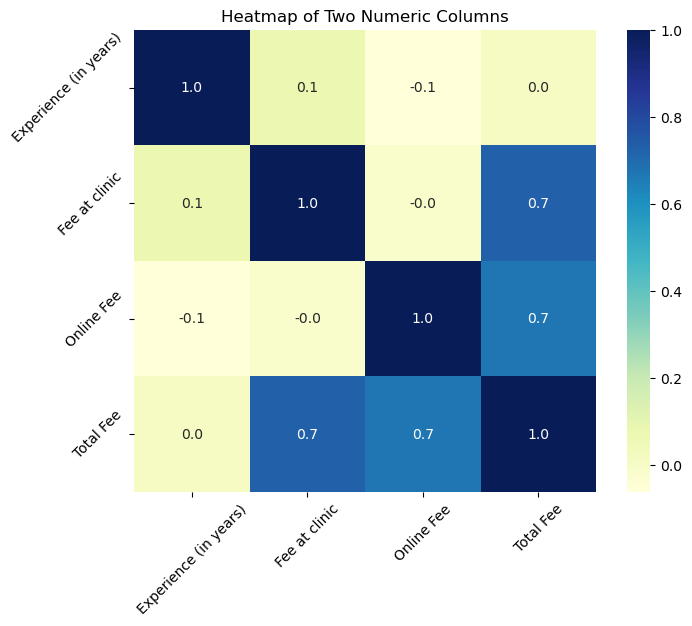

In [343]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes('float').corr(), annot=True, cmap='YlGnBu', fmt=".1f", square = True)
plt.title('Heatmap of Two Numeric Columns')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)

In [344]:
df

,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
0,Dr. Kaustubh Das,Dentist,22.0,"BDS, MFDS RCPS(Glasgow), FFD RCS (IRE)",500.0,0.0,ASPIRE CLINIC,Kolkata,10:00:00,19:00:00,Kolkata,500.0,09:00
1,Dr. Asif Naushad,Dentist,19.0,"House Surgeon, House Surgeon, House Surgeon, BDS",300.0,300.0,JM DENTAL,Kolkata,10:00:00,21:00:00,Kolkata,600.0,11:00
2,Dr. Prabhjeet Singh Sethi,Dentist,24.0,Certified Implantologist,500.0,350.0,Dontia Dental Care,Kolkata,15:00:00,20:00:00,Kolkata,850.0,05:00
3,Dr. Sanket Chakraverty,Dentist,15.0,"MDS Prosthodontics, B.D.S",300.0,300.0,Teeth Care Multispeciality Dental Clinic,Rajarhat Road,16:30:00,20:30:00,Kolkata,600.0,04:00
4,Dr. Subhajit Dutta,Dentist,13.0,BDS,500.0,300.0,SIGNATURE SMILE Dental Clinic,Kolkata,17:00:00,21:00:00,Kolkata,800.0,04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Dr. Vinodh R.S.,Ayurveda,22.0,"MBBS, MD - Physiology",100.0,250.0,Sri Marudhar Clinic,Bangalore,19:30:00,21:30:00,Bangalore,350.0,02:00
2227,Dr. Niveditha Shree K N,Ayurveda,12.0,Bachelor of Ayurvedic Medicine & Surgery,200.0,100.0,Ashwini Ayurveda,Banashankari,18:30:00,22:00:00,Bangalore,300.0,03:30
2229,Dr. Sumedha K A,Ayurveda,11.0,"BAMS, M.D Panchakarma",300.0,200.0,Shathayu Ayurveda clinic,AECS Layout,09:00:00,19:30:00,Bangalore,500.0,10:30
2230,Dr. Prema Jyothi Fraser,Ayurveda,8.0,MD,200.0,200.0,Sri Mahima Multispecality Homoeo Clinic,Jayanagar,17:00:00,20:30:00,Bangalore,400.0,03:30


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


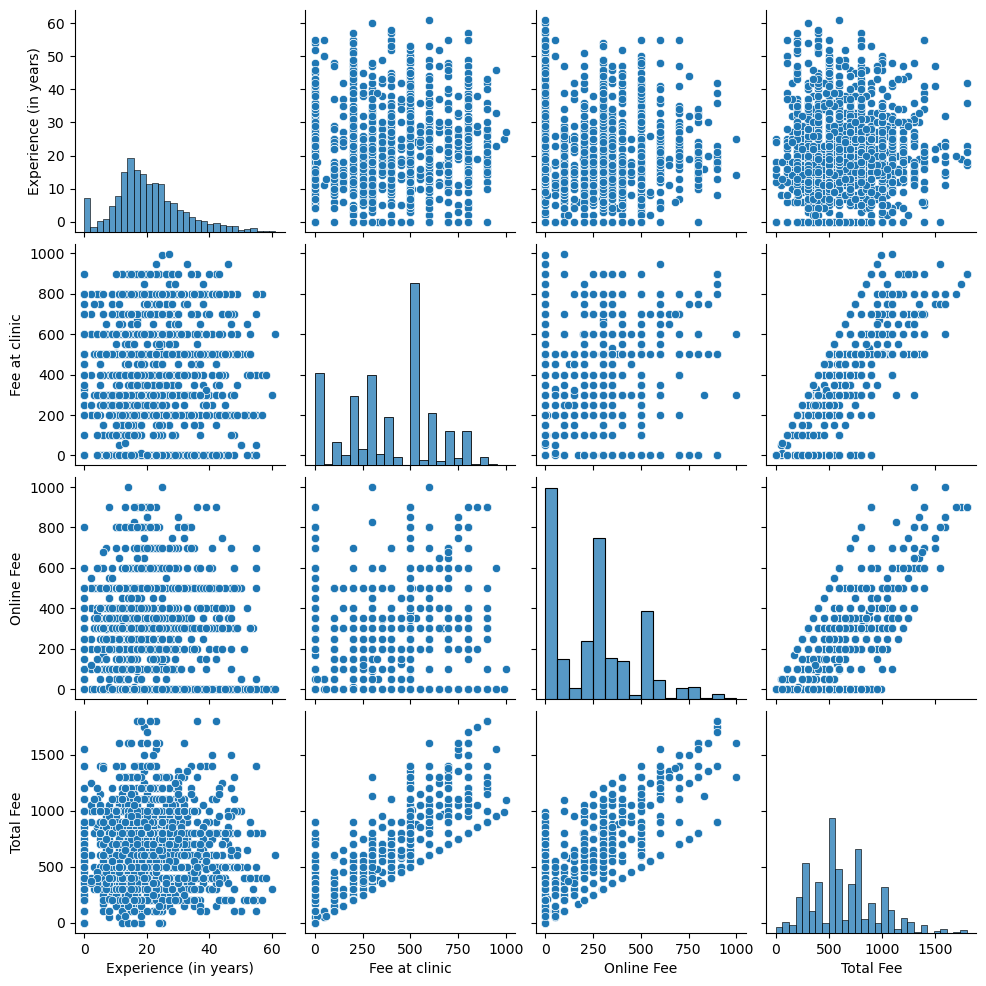

In [345]:
sns.pairplot(df)

# experiment

In [113]:
df[pd.to_datetime(df['Number of Hrs. Available']).dt.hour == pd.to_datetime(df['Number of Hrs. Available']).dt.hour.max()]

C:\Users\DELL\AppData\Local\Temp\ipykernel_16320\2354771449.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[pd.to_datetime(df['Number of Hrs. Available']).dt.hour == pd.to_datetime(df['Number of Hrs. Available']).dt.hour.max()]
C:\Users\DELL\AppData\Local\Temp\ipykernel_16320\2354771449.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[pd.to_datetime(df['Number of Hrs. Available']).dt.hour == pd.to_datetime(df['Number of Hrs. Available']).dt.hour.max()]


,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
103,Dr. Shibsankar Pal,General Physician,12.0,"MSCDFSM, BSc-Food and Applied Nutrition",500.0,500.0,DO OR DIET,Madhyamgram,09:00:00,21:00:00,Kolkata,1000.0,12:00
122,Dr. Shumayou,Orthopedist,40.0,"MBBS, PG Diploma in Hospital Management & Hosp...",300.0,0.0,Dr Chowdhury's Chamber,Mukundapur,09:00:00,21:00:00,Kolkata,300.0,12:00
153,Dr. Suresh Kumar Kejriwal,Orthopedist,8.0,MBBS Bachelor of Medicine and Bachelor of Surg...,400.0,200.0,Personal Home,Garia,07:00:00,19:00:00,Kolkata,600.0,12:00
173,Dr. Prof. Sabyasachi Biswas Hmo,Homeopathy,14.0,MBBS Bachelor of Medicine and Bachelor of Surg...,450.0,150.0,Apollo Clinic,Kolkata,08:00:00,20:00:00,Kolkata,600.0,12:00
176,Dr. R.K. Singh,Homeopathy,32.0,"Diploma in Orthopaedics, MD",500.0,0.0,Pain & Palliative Clinic,Kolkata,09:00:00,21:00:00,Kolkata,500.0,12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,Dr. Masroor Mir,General Physician,21.0,"SLE, Fellowship In Diabetology, Diploma In Psy...",900.0,900.0,Medicare Clinic,Ganga Nagar,09:00:00,21:00:00,Bangalore,1800.0,12:00
2039,Dr. Prasad S,General Physician,28.0,MBBS,300.0,0.0,Mamatha Clinic,Dasarahalli,09:00:00,21:00:00,Bangalore,300.0,12:00
2060,Dr. Deepak. C. E,Orthopedist,8.0,"DNB Orthopaedics , MCh Hip and Knee (Ortho)",300.0,350.0,Healing Bones,Kumaraswamy Layout,10:00:00,22:00:00,Bangalore,650.0,12:00
2130,Dr. Pooja A Kundargi,Gynaecologist,17.0,"MBBS, DGO, FMAS",300.0,0.0,Specialist Women's Clinic Gynecologist,Jnana Ganga Nagar,09:00:00,21:00:00,Bangalore,300.0,12:00


In [114]:
pd.to_datetime(df["Number of Hrs. Available"]).dt.time

C:\Users\DELL\AppData\Local\Temp\ipykernel_16320\4248754960.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df["Number of Hrs. Available"]).dt.time


0       09:00:00
1       11:00:00
2       05:00:00
3       04:00:00
4       04:00:00
          ...   
2225    02:00:00
2227    03:30:00
2229    10:30:00
2230    03:30:00
2231    03:00:00
Name: Number of Hrs. Available, Length: 2096, dtype: object

In [115]:
df2 = df.copy()

In [216]:
df.reset_index().groupby(['City','Specialization'])['index'].agg(['count'])

count
City      Specialization               
Bangalore Ayurveda                   32
          Dentist                    46
          Dermatologist              37
          Dietitian/Nutritionist     35
          General Physician          43
          Gynaecologist              46
          Homeopathy                 40
          Orthopedist                43
          Psychologist               13
Chennai   Ayurveda                   37
          Dentist                    37
          Dermatologist              40
          Dietitian/Nutritionist     27
          General Physician          39
          Gynaecologist              41
          Homeopathy                 45
          Orthopedist                41
          Psychologist               23
Delhi     Ayurveda                   24
          Dentist                    42
          Dermatologist              27
          Dietitian/Nutritionist     34
          General Physician          31
          Gynaecologist              38
          Homeopathy                 40
          Orthopedist                30
          Psychologist               28
Hyderabad Ayurveda                   39
          Dentist                    44
          Dermatologist              41
          Dietitian/Nutritionist     35
          General Physician          42
          Gynaecologist              48
          Homeopathy                 39
          Orthopedist                41
          Psychologist               16
Kolkata   Dentist                    40
          Dietitian/Nutritionist     36
          General Physician          27
          Homeopathy                 38
          Orthopedist                38
Mumbai    Ayurveda                   29
          Dentist                    46
          Dermatologist              27
          Dietitian/Nutritionist     32
          General Physician          32
          Gynaecologist              35
          Homeopathy                 38
          Orthopedist                25
          Psychologist                9
Pune      Ayurveda                   35
          Dentist                    44
          Dermatologist              43
          Dietitian/Nutritionist     34
          General Physician          41
          Gynaecologist              42
          Homeopathy                 38
          Orthopedist                40
          Psychologist               23

In [217]:
print('Dermatologist')
a = df.reset_index()[df.reset_index()['Specialization'] == 'Dermatologist'].groupby(['City'])['index'].agg(['count']).sort_values('count',ascending = False)
df.reset_index()[df.reset_index()['Specialization'] == 'Dermatologist'].groupby(['City'])['index'].agg(['count']).sort_values('count',ascending = False)

Dermatologist


,count
City,
Pune,43
Hyderabad,41
Chennai,40
Bangalore,37
Delhi,27
Mumbai,27


In [363]:
df[df['City'] == 'Pune'].describe().loc[['mean','min','max']]

,Experience (in years),Fee at clinic,Online Fee,Total Fee
mean,19.320588,415.141176,232.011765,647.152941
min,0.000000,0.000000,0.000000,0.000000
max,57.000000,999.000000,999.000000,1800.000000


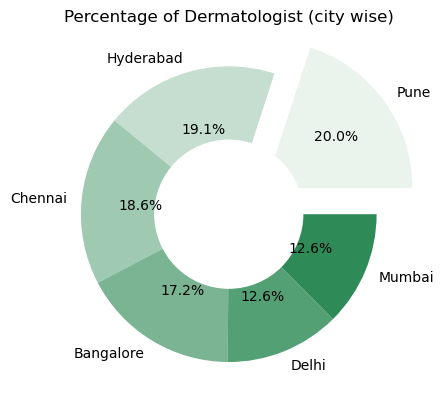

In [219]:
colors = sns.light_palette("seagreen")
plt.title('Percentage of Dermatologist (city wise)')
plt.pie(a['count'],colors = colors,labels = a.index, autopct='%.1f%%',explode = [0.3,0,0,0,0,0])

# add a circle at the center to transform it in a donut chart

my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [220]:
print('Diet and Nutrition')
a = df.reset_index()[df.reset_index()['Specialization'] == 'Dietitian/Nutritionist'].groupby(['City'])['index'].agg(['count']).sort_values('count',ascending = False)
df.reset_index()[df.reset_index()['Specialization'] == 'Dietitian/Nutritionist'].groupby(['City'])['index'].agg(['count']).sort_values('count',ascending = False)

Diet and Nutrition


,count
City,
Kolkata,36
Bangalore,35
Hyderabad,35
Delhi,34
Pune,34
Mumbai,32
Chennai,27


In [361]:
df[df['City'] == 'Kolkata'].describe().loc[['mean','min','max']]

,Experience (in years),Fee at clinic,Online Fee,Total Fee
mean,18.117318,469.664804,234.173184,703.837989
min,0.000000,0.000000,0.000000,100.000000
max,55.000000,990.000000,900.000000,1750.000000


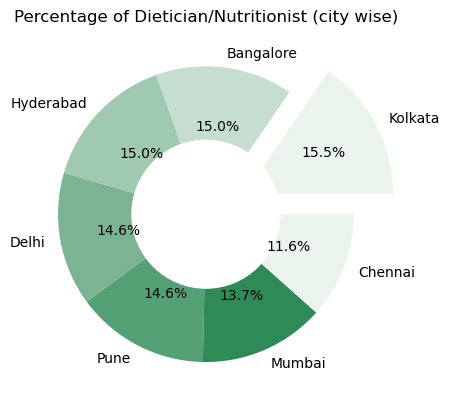

In [222]:
colors = sns.light_palette("seagreen")
plt.title('Percentage of Dietician/Nutritionist (city wise)')
plt.pie(a['count'],colors = colors,labels = a.index, autopct='%.1f%%',explode = [0.3,0,0,0,0,0,0])

# add a circle at the center to transform it in a donut chart

my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [223]:
print('Psychologist')
a = df.reset_index()[df.reset_index()['Specialization'] == 'Psychologist'].groupby(['City'])['index'].agg(['count']).sort_values('count',ascending = False)
df.reset_index()[df.reset_index()['Specialization'] == 'Psychologist'].groupby(['City'])['index'].agg(['count']).sort_values('count',ascending = False)

Psychologist


,count
City,
Delhi,28
Chennai,23
Pune,23
Hyderabad,16
Bangalore,13
Mumbai,9


In [362]:
df[df['City'] == 'Delhi'].describe().loc[['mean','min','max']]

,Experience (in years),Fee at clinic,Online Fee,Total Fee
mean,22.97619,372.513605,372.139456,744.653061
min,0.00000,0.000000,0.000000,100.000000
max,55.00000,900.000000,900.000000,1800.000000


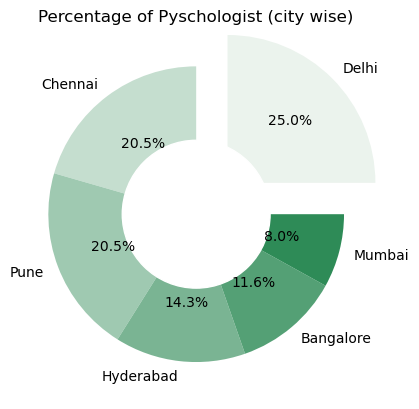

In [224]:
colors = sns.light_palette("seagreen")
plt.title('Percentage of Pyschologist (city wise)')
plt.pie(a['count'],colors = colors,labels = a.index, autopct='%.1f%%',explode = [0.3,0,0,0,0,0])

# add a circle at the center to transform it in a donut chart

my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [227]:
df

,Name,Specialization,Experience (in years),Education,Fee at clinic,Online Fee,Clinic Name,Area,Available From,Available Till,City,Total Fee,Number of Hrs. Available
0,Dr. Kaustubh Das,Dentist,22.0,"BDS, MFDS RCPS(Glasgow), FFD RCS (IRE)",500.0,0.0,ASPIRE CLINIC,Kolkata,10:00:00,19:00:00,Kolkata,500.0,09:00
1,Dr. Asif Naushad,Dentist,19.0,"House Surgeon, House Surgeon, House Surgeon, BDS",300.0,300.0,JM DENTAL,Kolkata,10:00:00,21:00:00,Kolkata,600.0,11:00
2,Dr. Prabhjeet Singh Sethi,Dentist,24.0,Certified Implantologist,500.0,350.0,Dontia Dental Care,Kolkata,15:00:00,20:00:00,Kolkata,850.0,05:00
3,Dr. Sanket Chakraverty,Dentist,15.0,"MDS Prosthodontics, B.D.S",300.0,300.0,Teeth Care Multispeciality Dental Clinic,Rajarhat Road,16:30:00,20:30:00,Kolkata,600.0,04:00
4,Dr. Subhajit Dutta,Dentist,13.0,BDS,500.0,300.0,SIGNATURE SMILE Dental Clinic,Kolkata,17:00:00,21:00:00,Kolkata,800.0,04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,Dr. Vinodh R.S.,Ayurveda,22.0,"MBBS, MD - Physiology",100.0,250.0,Sri Marudhar Clinic,Bangalore,19:30:00,21:30:00,Bangalore,350.0,02:00
2227,Dr. Niveditha Shree K N,Ayurveda,12.0,Bachelor of Ayurvedic Medicine & Surgery,200.0,100.0,Ashwini Ayurveda,Banashankari,18:30:00,22:00:00,Bangalore,300.0,03:30
2229,Dr. Sumedha K A,Ayurveda,11.0,"BAMS, M.D Panchakarma",300.0,200.0,Shathayu Ayurveda clinic,AECS Layout,09:00:00,19:30:00,Bangalore,500.0,10:30
2230,Dr. Prema Jyothi Fraser,Ayurveda,8.0,MD,200.0,200.0,Sri Mahima Multispecality Homoeo Clinic,Jayanagar,17:00:00,20:30:00,Bangalore,400.0,03:30


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2096 entries, 0 to 2231
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2096 non-null   object 
 1   Specialization            2096 non-null   object 
 2   Experience (in years)     2096 non-null   float64
 3   Education                 2096 non-null   object 
 4   Fee at clinic             2096 non-null   float64
 5   Online Fee                2096 non-null   float64
 6   Clinic Name               2096 non-null   object 
 7   Area                      2096 non-null   object 
 8   Available From            2096 non-null   object 
 9   Available Till            2096 non-null   object 
 10  City                      2096 non-null   object 
 11  Total Fee                 2096 non-null   float64
 12  Number of Hrs. Available  2096 non-null   object 
dtypes: float64(4), object(9)
memory usage: 229.2+ KB
